**Train a sckit-leaarn MLP Classifer to classify the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
features , label = make_classification(n_features = 4, n_classes =3,
                                       n_redundant = 0, n_samples = 500,
                                       weights = [0.2, 0.3, 0.5],
                                       n_informative = 2,
                                       n_clusters_per_class = 1,
                                       random_state = 1928584)
# features : X; label : y
# n_features : đầu vào 4 cột
# n_class : 3 đầu ra
# n_redundant : 
# n_samples : 500 dữ liệu
# n_informative : số lượng các tính năng cung cấp thông tin
# n_clusters_per_class : số cụm mỗi class

    

In [3]:
features.shape

(500, 4)

In [4]:
label.shape

(500,)

In [5]:
features_name = ["Features 1", "Features 2", "Features 3", "Features 4"]

In [6]:
features_df = pd.DataFrame(features, columns = features_name)
features_df.iloc[5:10:2]

,Features 1,Features 2,Features 3,Features 4
5,0.473164,0.794232,0.566033,2.005167
7,0.206351,0.446017,1.363068,-0.184051
9,-0.340495,-1.737951,0.904326,-1.072036


In [7]:
label_name = ["OutPut"]

In [8]:
label_df = pd.DataFrame(label, columns = label_name)
label_df.head()

,OutPut
0,2
1,0
2,2
3,2
4,2


In [9]:
dataset = pd.concat([features_df, label_df], axis = 1, join = 'inner', sort = False )
dataset

,Features 1,Features 2,Features 3,Features 4,OutPut
0,-1.355431,-0.349121,1.902813,0.543027,2
1,-0.899906,-3.495220,1.647846,0.192594,0
2,-0.397549,-1.322931,1.970084,-0.301434,2
3,-1.034399,1.464032,0.068382,-2.119980,2
4,0.491798,1.015990,1.414727,-0.989749,2
...,...,...,...,...,...
495,-1.061543,-1.377133,0.696466,-3.275376,2
496,0.486848,0.702052,0.683843,0.786919,1
497,0.135271,-0.685148,-1.868783,0.960743,1
498,0.396692,0.332662,1.085845,0.845767,0


In [10]:
dataset.describe()

,Features 1,Features 2,Features 3,Features 4,OutPut
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.050692,0.002275,0.423618,-0.011600,1.298000
std,0.959005,1.022719,1.277909,1.308487,0.783853
min,-3.383609,-3.495220,-3.621049,-3.362680,0.000000
25%,-0.669444,-0.629344,-0.108509,-1.060965,1.000000
50%,-0.025557,0.061782,0.655020,0.193318,1.500000
75%,0.594860,0.683117,1.320128,0.985227,2.000000
max,2.407278,3.211541,2.859509,3.792591,2.000000


**describe()** phương pháp được sử dụng để phân tích dữ liệu số cũng như chuỗi đối tượng cũng được sử dụng để phân tích khung dữ liệu có chứa các kiểu dữ liệu hỗn hợp

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Features 1  500 non-null    float64
 1   Features 2  500 non-null    float64
 2   Features 3  500 non-null    float64
 3   Features 4  500 non-null    float64
 4   OutPut      500 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 17.7 KB


**info()** hàm được sử dụng để xem tổng quan nhanh về khung dữ liệu và tóm tắt ngắn gọn về khung dữ liệu vì nó thực sự hữu ích khi thực hiện phân tích khám phá dữ liệu

### Value counting of OutPut

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21688\3524386331.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True, which = 'major', color = 'black', linestyle = '--')


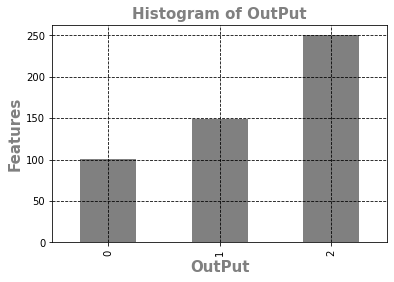

In [12]:
output_counts = pd.value_counts(dataset['OutPut'], sort = True).sort_index()
output_counts.plot(kind = 'bar', color = 'gray')
plt.title('Histogram of OutPut', fontweight = 'bold', fontsize = 15, color = 'gray')
plt.xlabel('OutPut', fontweight = 'bold', fontsize = 15, color = 'gray')
plt.ylabel('Features', fontweight = 'bold', fontsize = 15, color = 'gray')
plt.grid(b = True, which = 'major', color = 'black', linestyle = '--')
plt.show()

**pandas.value_counts**: hàm được xây dựng trên hàm pandas trả về một đối tượng chứa số lượng giá trị duy nhất theo thứ tự được sắp xếp. Trong trường hợp của chúng tôi, tôi đã sử dụng hàm value_counts () và vẽ biểu đồ kết quả dựa trên phân loại kết quả 0, 1, 2

**plt.grid**: sử dụng để vẽ đường lưới

In [13]:
low_output = dataset[dataset['OutPut'] == 0]
medium_output = dataset[dataset['OutPut'] == 1]
high_output = dataset[dataset['OutPut'] == 2]

print('The output having result 0 is : ', low_output.shape)
print('The output having result 1 is : ', medium_output.shape)
print('The output having result 2 is : ', high_output.shape)

The output having result 0 is :  (101, 5)
The output having result 1 is :  (149, 5)
The output having result 2 is :  (250, 5)


In [14]:
dataset.OutPut.value_counts()

2    250
1    149
0    101
Name: OutPut, dtype: int64

**sns.sccaterplot**: được sử dụng để hiển thị mối quan hệ giữa x và y cho các tập con dữ liệu khác nhau bằng cách sử dụng các thông số hue, style, paletter paremeters được sử dụng để làm cho đồ họa trở nên nổi bật hơn
1. **x and y** : là biến dữ liệu đầu vào có thể là cột tham chiếu trực tiếp trong tập dữ liệu
2. **hue** : hue (màu săc) là tên của các biến được sử dụng để nhóm các biến tạo ra các điểm có màu sắc khác nhau. Ví dụ trong trường hợp của chúng ta 0, 1, 2 là các lớp khác nhau được phân tách bằng các lớp khác nhau
3. **style** : là tên của biến sẽ cung cấp các điểm với các marker khác nhau
4. **palette** : Màu sắc sử dụng cho các nhãn khác nhau của các biến màu
5. **data** : DataFrame nơi mỗi cột là 1 biến và mỗi hàng là sự quan sát

*Chúng ta sẽ thử các features xem cái nào sẽ phân ra 3 cụm 0, 1, 2 rõ ràng nhất*

<AxesSubplot:xlabel='Features 1', ylabel='Features 2'>

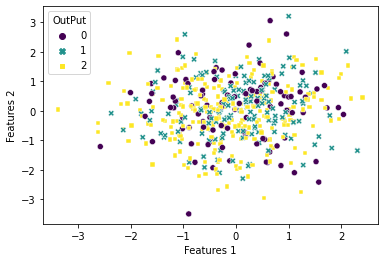

In [15]:
sns.scatterplot(x = 'Features 1', y = 'Features 2', hue = 'OutPut', style = 'OutPut', palette = 'viridis', data = dataset)

<AxesSubplot:xlabel='Features 1', ylabel='Features 3'>

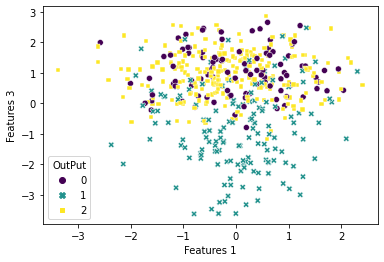

In [16]:
sns.scatterplot(x = 'Features 1', y = 'Features 3', hue = 'OutPut', style = 'OutPut', palette = 'viridis', data = dataset)

<AxesSubplot:xlabel='Features 1', ylabel='Features 4'>

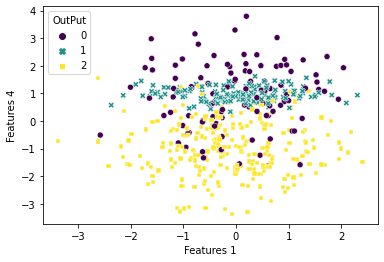

In [17]:
sns.scatterplot(x = 'Features 1', y = 'Features 4', hue = 'OutPut', style = 'OutPut', palette = 'viridis', data = dataset)

<AxesSubplot:xlabel='Features 2', ylabel='Features 3'>

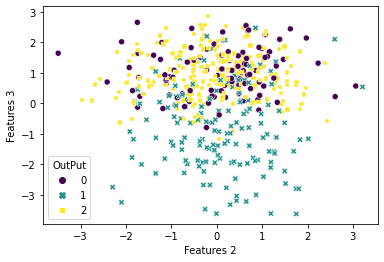

In [18]:
sns.scatterplot(x = 'Features 2', y = 'Features 3', hue = 'OutPut', style = 'OutPut', palette = 'viridis', data = dataset)

<AxesSubplot:xlabel='Features 2', ylabel='Features 4'>

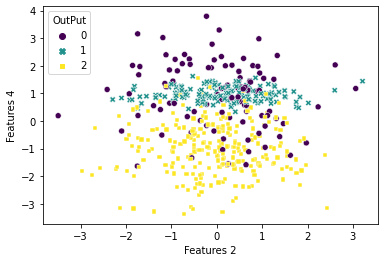

In [19]:
sns.scatterplot(x = 'Features 2', y = 'Features 4', hue = 'OutPut', style = 'OutPut', palette = 'viridis', data = dataset)

<AxesSubplot:xlabel='Features 3', ylabel='Features 4'>

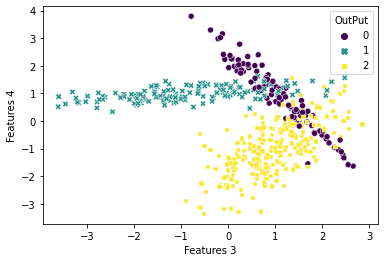

In [20]:
sns.scatterplot(x = 'Features 3', y = 'Features 4', hue = 'OutPut', style = 'OutPut', palette = 'viridis', data = dataset)

**scipy.stats** : Mô-đun này chứa một số lượng lớn các phân phối xác suất cũng như một thư viện các hàm thống kê đang phát triển

**scipy.stats.noem** : Nó được sử dụng cho biến liên tục bình thường

**matplotlib.gridspec** : Tôi đã sử dụng một mô-đun gridspec để chỉ định vị trí của subplot trong hình; cũng mô-đun này chỉ định hình dạng của lưới mà một subplot sẽ được đặt

**gridspec.Gridspec(28,1)** : Giúp cài đặt số hàng và số cột

Tôi đã chọn các thùng bằng 50 thì đầu vào sẽ chia thành 50 khoảng các thùng nếu có thể

Tôi đã sử dụng vòng lặp để chỉ định hình học của lưới từ Feature 1 tới Feautures 4

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

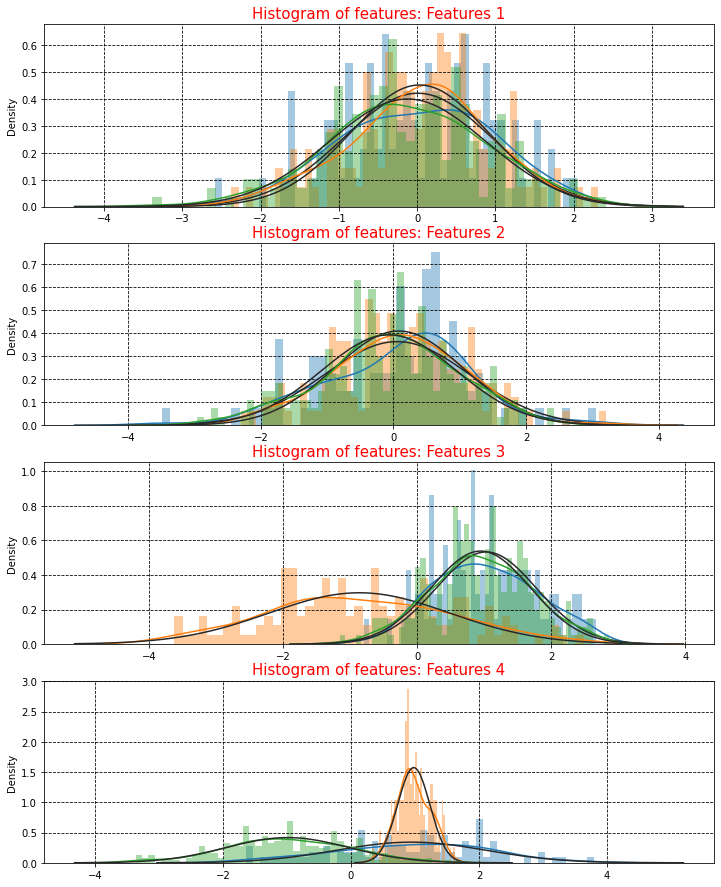

In [21]:
from scipy.stats import norm
import matplotlib.gridspec as gridspec
col_features = dataset.iloc[:,0:4].columns # Lấy tên các cột
#col_features
bins = 50
plt.figure(figsize = (12, 28*4))
gs = gridspec.GridSpec(28, 1)

for count, elem in enumerate(dataset[col_features]):
    ax = plt.subplot(gs[count])
    sns.distplot(dataset[elem][dataset.OutPut == 0], bins = bins, fit = norm)
    sns.distplot(dataset[elem][dataset.OutPut == 1], bins = bins, fit = norm)    
    sns.distplot(dataset[elem][dataset.OutPut == 2], bins = bins, fit = norm)
    ax.set_xlabel('')
    ax.set_title('Histogram of features: ' + str(elem), fontsize = '15', color = "red")
    plt.grid(b = True, which  = 'major', color = 'black', linestyle = '--')
plt.show()

**SMOTE** : SMOTE là một phương pháp lấy data quá mức tạo ra các ví dụ tổng hợp từ lớp nhỏ thay vì tạo data. Thuật toán chọn hai hoặc nhiều trường hợp giống nhau và tạo một phiên bản thuộc tính tại một thời điểm bằng số lượng ngẫu nhiên trong sự khác biệt với các phiên bản lân cận

**SMOTE PROCESS** : Xác định vectơ đối tượng và các lân cận gần nhất của nó - Lấy hiệu số giữa hai lân cận giữa vectơ - Nhân sự khác biệt với một số ngẫu nhiên giữa 0 và 1 - Xác định một điểm mới trên phân đoạn đường bằng cách thêm số ngẫu nhiên vào vectơ đối tượng - lặp lại quy trình cho vectơ xác định

**SMOTE medthod** là phương pháp tiếp cận được sử dụng để tăng các lớp thiểu số trong dữ liệu được tạo ngẫu nhiên

In [22]:
from imblearn.over_sampling import SMOTE as sm
x_sampled, y_sampled = sm().fit_resample(features, label)
from collections import Counter # separate collection for 0, 1 and 2
print(sorted(Counter(y_sampled).items()))


[(0, 250), (1, 250), (2, 250)]


**Sklearn** : cung cấp chức năng tốt nhất để phân vùng dữ liệu vào tập huấn luyện và thử nghiệm. Chúng tôi cung cấp tỷ lệ dữ liệu nhất định để sử dụng làm thử nghiệm và chúng tôi có thể cung cấp một số tham số nhất định như: - random_state để đảm bảo kết quả có thể lặp lại: - test_size quyết định kích thước dữ liệu phải chia làm tập dữ liệu thử nghiệm trong đó chúng tôi đã sử dụng 20% dữ liệu được tạo ngẫu nhiên dữ liệu dưới dạng bộ kiểm tra và 80% dữ liệu còn lại dưới dạng dữ liệu đào tạo

While spliting 600 dataset for training and 150 dataset for testing

In [23]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 1928584)
print('Total training features: ', xTrain.shape)
print('Total testing features: ', xTest.shape)

x_train_sampled_data = pd.DataFrame(xTrain)
x_test_sampled_data = pd.DataFrame(xTest)
y_train_sampled_data = pd.DataFrame(yTrain)
y_test_sampled_data = pd.DataFrame(yTest)

Total training features:  (600, 4)
Total testing features:  (150, 4)


Ở trên tạo tập dữ liệu ngẫu nhiên thuộc về vấn đề phân loại với các nhãn khác nhau, tức là 0, 1 và 2 còn được gọi là supervised machine learning

**Several methods:**
1. Nearest-Neighbor
2. Aritificial Neural Network (ANN)
3. Support Vector Machine
4. Decision Trees

**Aritificial Neural Network (ANN)**
ANN còn được gọi là một mô hình tính toán cũng được coi là công cụ mô hình hóa dữ liệu thống kê phi tuyến tính dựa trên cấu trúc và chức năng của mạng trung tính sinh học, nơi được mô hình hóa hoặc các mẫu được tìm thấy cho các mối quan hệ phức tạp giữa đầu vào và đầu ra

### Bulid MLP Classifier model

**hidden_layer_sizes**: đây là tham số đầu tiên được sử dụng trong mô hình cho phép thiết lập số lớp **(layers)** và số nút **(nodes)** trong bộ phân loại mạng thần kinh, hidden_layer_sizes = (300), có nghĩa là 1 hidden layer với 300 hidden units

**activation**: chức năng kích hoạt cho **hidden layers**. Trong tham số này, tôi đã sử dụng **relu** làm hàm kích hoạt mô hình của mình, đây là hàm kích hoạt phi tuyến tính có nghĩa là nó không kích hoạt tất cả các nơron cùng một lúc

**Verbose**: thông số thứ ba dài dòng với giá trị = 1 có nghĩa là, điều này bao gồm cả thanh tiến trình và một dòng cho mỗi epoch

**Solver**: được sử dụng để tối ưu hóa trọng số trên các nút, tôi đã sử dụng bộ giải là **adam** đề cập đến trình tối ưu hóa dựa trên độ dốc Stochastic **sgd** được đề xuất bởi Kingma, Diederik và Jimmy Ma, hoạt động khá tốt đối với tập dữ liệu lớn về thời gian đào tạo và điểm xác thực

**batch_size**: nó là một thuật ngữ được sử dụng trong học máy đề cập đến số lượng các ví dụ đào tạo (training) được sử dụng trong một hàm - liên quan đến giảm độ dốc ngẫu nhiên **sgd**

**learning_rate**:  siêu tham số có thể định cấu hình được sử dụng trong việc đào tạo mạng nơ-ron có phạm vi giá trị dương từ 0 đến 1, **learning_rate = 'constant'** là tốc độ học không đổi do learning_rate_init cung cấp

**learning_rate_init**: với giá trị mặc định bằng double (0,001) và **solver = 'sgd'** hoặc **'adam'** kiểm soát kích thước bước trong khi cập nhật trọng lượng

**max_iter**: là số lần lặp lại **(epoch)** tối đa mà bạn muốn mô hình được đào tạo. Đây được gọi là tối đa vì quá trình học có thể bị dừng lại trước khi đạt đến tối đa số lần lặp cũng như dựa trên dấu hiệu chấm dứt

Sau khi sử dụng **MLP Classifier** với các thông số khác nhau, nhiệm vụ tiếp theo của chúng ta là gọi phương thức () cùng với dữ liệu đào tạo của chúng ta

sau khi đào tạo mô hình của bạn, bây giờ là lúc để đưa ra một số dự đoán. Đối với điều này, chúng tôi sẽ sử dụng dữ liệu thử nghiệm và xem mô hình của chúng tôi dự đoán tỷ lệ phần trăm một cách chính xác như thế nào

In [24]:
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
mlp = MLPClassifier(hidden_layer_sizes = (300),
                   activation = 'relu',
                   verbose = 1,
                    solver = 'adam',
                    batch_size = 32,
                    learning_rate = 'constant',
                    learning_rate_init = 0.001,
                    max_iter = 1000)
# FIT the model
mlp = mlp.fit(x_train_sampled_data, y_train_sampled_data)

Iteration 1, loss = 0.93283214
Iteration 2, loss = 0.67273287
Iteration 3, loss = 0.56535560
Iteration 4, loss = 0.51320229
Iteration 5, loss = 0.48539076
Iteration 6, loss = 0.46630591
Iteration 7, loss = 0.44926252


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 8, loss = 0.43577350
Iteration 9, loss = 0.42094672
Iteration 10, loss = 0.40848618
Iteration 11, loss = 0.40005893
Iteration 12, loss = 0.38525142
Iteration 13, loss = 0.37440342
Iteration 14, loss = 0.36323125
Iteration 15, loss = 0.35453507
Iteration 16, loss = 0.34501086
Iteration 17, loss = 0.33735738
Iteration 18, loss = 0.33141982
Iteration 19, loss = 0.32053542
Iteration 20, loss = 0.31359072
Iteration 21, loss = 0.30848667
Iteration 22, loss = 0.30089032
Iteration 23, loss = 0.29493734
Iteration 24, loss = 0.28957093
Iteration 25, loss = 0.28251285
Iteration 26, loss = 0.27782385
Iteration 27, loss = 0.27555831
Iteration 28, loss = 0.26915829
Iteration 29, loss = 0.26484092
Iteration 30, loss = 0.25936371
Iteration 31, loss = 0.25611644
Iteration 32, loss = 0.25315429
Iteration 33, loss = 0.25039450
Iteration 34, loss = 0.24662062
Iteration 35, loss = 0.24252074
Iteration 36, loss = 0.23907262
Iteration 37, loss = 0.23660815
Iteration 38, loss = 0.23433583
Iteration 

Iteration 265, loss = 0.09768266
Iteration 266, loss = 0.09661597
Iteration 267, loss = 0.09759086
Iteration 268, loss = 0.09844574
Iteration 269, loss = 0.09606339
Iteration 270, loss = 0.09791793
Iteration 271, loss = 0.09604924
Iteration 272, loss = 0.09760129
Iteration 273, loss = 0.09889828
Iteration 274, loss = 0.09518096
Iteration 275, loss = 0.09570771
Iteration 276, loss = 0.09608546
Iteration 277, loss = 0.09610704
Iteration 278, loss = 0.09738814
Iteration 279, loss = 0.09459124
Iteration 280, loss = 0.09742602
Iteration 281, loss = 0.09570203
Iteration 282, loss = 0.09345319
Iteration 283, loss = 0.09361859
Iteration 284, loss = 0.09399409
Iteration 285, loss = 0.09842807
Iteration 286, loss = 0.09542116
Iteration 287, loss = 0.09729330
Iteration 288, loss = 0.09549880
Iteration 289, loss = 0.09208735
Iteration 290, loss = 0.09307451
Iteration 291, loss = 0.09256037
Iteration 292, loss = 0.10074678
Iteration 293, loss = 0.09403739
Iteration 294, loss = 0.09154266
Iteration 

In [25]:
yPred = mlp.predict(x_test_sampled_data)

### Cross Validation

1. **cross validation**: là một quy trình lấy mẫu lại được sử dụng để đánh giá các mô hình học máy trên một mẫu dữ liệu hạn chế
2. Kỹ thuật liên quan đến việc phân vùng tập dữ liệu quan sát ban đầu thành tập huấn luyện được sử dụng để huấn luyện mô hình và tập thử nghiệm được sử dụng để đánh giá phân tích
3. Kỹ thuật xác nhận chéo phổ biến nhất là k-fold. Trong sổ ghi chép này, tôi phải sử dụng giá trị k = 10 nơi dữ liệu được chia thành 10 phân đoạn (10-1 = 9) trong số chúng được sử dụng để đào tạo trong khi bây giờ được bỏ ra và dùng để kiểm tra. Nó được thực hiện trong 10 lần, lần đầu tiên, các phân đoạn đầu tiên được sử dụng để kiểm tra và phần còn lại được sử dụng để đào tạo, sau đó phân đoạn thứ hai được sử dụng để kiểm tra và phần còn lại được sử dụng để đào tạo, v.v

**Training and Testing**
Trong bài toán phân loại, k mô hình được tạo ra là mô hình chính xác nhất

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, y_test_sampled_data, yPred, cv = 10)

# mlp : mô hình cần được đánh giá
# y_test_sampled_data : dữ liệu thử nghiệm thực tế
# yPred : dữ liệu dự đoán

Iteration 1, loss = 1.05851856
Iteration 2, loss = 1.00409731
Iteration 3, loss = 0.96437213
Iteration 4, loss = 0.93059110
Iteration 5, loss = 0.90361282
Iteration 6, loss = 0.87807611
Iteration 7, loss = 0.85583078
Iteration 8, loss = 0.83184265
Iteration 9, loss = 0.81103266
Iteration 10, loss = 0.78853213
Iteration 11, loss = 0.76865683
Iteration 12, loss = 0.74920647
Iteration 13, loss = 0.73082588
Iteration 14, loss = 0.71488368
Iteration 15, loss = 0.70064693
Iteration 16, loss = 0.68525258
Iteration 17, loss = 0.67170236
Iteration 18, loss = 0.65839519
Iteration 19, loss = 0.64639851
Iteration 20, loss = 0.63551495
Iteration 21, loss = 0.62441021
Iteration 22, loss = 0.61490655
Iteration 23, loss = 0.60529168
Iteration 24, loss = 0.59774355
Iteration 25, loss = 0.58930526
Iteration 26, loss = 0.58162473
Iteration 27, loss = 0.57351657
Iteration 28, loss = 0.56741099
Iteration 29, loss = 0.56424762
Iteration 30, loss = 0.55880493
Iteration 31, loss = 0.55116282
Iteration 32, los

Iteration 97, loss = 0.41180056
Iteration 98, loss = 0.41301979
Iteration 99, loss = 0.41239153
Iteration 100, loss = 0.41007369
Iteration 101, loss = 0.40768876
Iteration 102, loss = 0.40695422
Iteration 103, loss = 0.40562789
Iteration 104, loss = 0.40550294
Iteration 105, loss = 0.40592072
Iteration 106, loss = 0.40347420
Iteration 107, loss = 0.40307862
Iteration 108, loss = 0.40373056
Iteration 109, loss = 0.40222276
Iteration 110, loss = 0.40266626
Iteration 111, loss = 0.40289545
Iteration 112, loss = 0.40228900
Iteration 113, loss = 0.40199467
Iteration 114, loss = 0.40111953
Iteration 115, loss = 0.40086062
Iteration 116, loss = 0.39997024
Iteration 117, loss = 0.39971421
Iteration 118, loss = 0.39994009
Iteration 119, loss = 0.39836583
Iteration 120, loss = 0.39731315
Iteration 121, loss = 0.39754692
Iteration 122, loss = 0.39675825
Iteration 123, loss = 0.39657411
Iteration 124, loss = 0.39648459
Iteration 125, loss = 0.39643633
Iteration 126, loss = 0.39572662
Iteration 127

Iteration 179, loss = 0.37184182
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.06885944
Iteration 2, loss = 1.01832467
Iteration 3, loss = 0.98025379
Iteration 4, loss = 0.94566182
Iteration 5, loss = 0.91625050
Iteration 6, loss = 0.88930438
Iteration 7, loss = 0.86445479
Iteration 8, loss = 0.83970648
Iteration 9, loss = 0.81663027
Iteration 10, loss = 0.79301445
Iteration 11, loss = 0.77306549
Iteration 12, loss = 0.75254518
Iteration 13, loss = 0.73396495
Iteration 14, loss = 0.71722609
Iteration 15, loss = 0.70122586
Iteration 16, loss = 0.68678410
Iteration 17, loss = 0.67428061
Iteration 18, loss = 0.66130369
Iteration 19, loss = 0.64815277
Iteration 20, loss = 0.63638698
Iteration 21, loss = 0.62382093
Iteration 22, loss = 0.61339962
Iteration 23, loss = 0.60273082
Iteration 24, loss = 0.59169382
Iteration 25, loss = 0.58377495
Iteration 26, loss = 0.57629025
Iteration 27, loss = 0.56781143
Iteration 28, loss = 0

Iteration 71, loss = 0.41108033
Iteration 72, loss = 0.40856918
Iteration 73, loss = 0.40798537
Iteration 74, loss = 0.40502740
Iteration 75, loss = 0.40324252
Iteration 76, loss = 0.40156521
Iteration 77, loss = 0.40036674
Iteration 78, loss = 0.40056303
Iteration 79, loss = 0.39861991
Iteration 80, loss = 0.39589823
Iteration 81, loss = 0.39439065
Iteration 82, loss = 0.39601423
Iteration 83, loss = 0.39286422
Iteration 84, loss = 0.39078545
Iteration 85, loss = 0.38893991
Iteration 86, loss = 0.38848885
Iteration 87, loss = 0.38732096
Iteration 88, loss = 0.38629424
Iteration 89, loss = 0.38555153
Iteration 90, loss = 0.38416386
Iteration 91, loss = 0.38401199
Iteration 92, loss = 0.38201114
Iteration 93, loss = 0.38108767
Iteration 94, loss = 0.38040725
Iteration 95, loss = 0.37925727
Iteration 96, loss = 0.37904018
Iteration 97, loss = 0.37839875
Iteration 98, loss = 0.37765407
Iteration 99, loss = 0.37669405
Iteration 100, loss = 0.37602260
Iteration 101, loss = 0.37566257
Iterat

Iteration 149, loss = 0.39172011
Iteration 150, loss = 0.39190551
Iteration 151, loss = 0.39013510
Iteration 152, loss = 0.38956760
Iteration 153, loss = 0.38869273
Iteration 154, loss = 0.38795039
Iteration 155, loss = 0.38760786
Iteration 156, loss = 0.38755802
Iteration 157, loss = 0.38722967
Iteration 158, loss = 0.38654788
Iteration 159, loss = 0.38685391
Iteration 160, loss = 0.38746029
Iteration 161, loss = 0.38694015
Iteration 162, loss = 0.38749679
Iteration 163, loss = 0.38620213
Iteration 164, loss = 0.38588651
Iteration 165, loss = 0.38647090
Iteration 166, loss = 0.38619508
Iteration 167, loss = 0.38612865
Iteration 168, loss = 0.38622054
Iteration 169, loss = 0.38802479
Iteration 170, loss = 0.38946945
Iteration 171, loss = 0.38773090
Iteration 172, loss = 0.38577584
Iteration 173, loss = 0.38556553
Iteration 174, loss = 0.38602991
Iteration 175, loss = 0.38576401
Iteration 176, loss = 0.38603557
Iteration 177, loss = 0.38529193
Iteration 178, loss = 0.38580038
Iteration 

Iteration 15, loss = 0.71964873
Iteration 16, loss = 0.70451649
Iteration 17, loss = 0.69093963
Iteration 18, loss = 0.67665039
Iteration 19, loss = 0.66261964
Iteration 20, loss = 0.65021494
Iteration 21, loss = 0.63747949
Iteration 22, loss = 0.62766281
Iteration 23, loss = 0.61533251
Iteration 24, loss = 0.60526643
Iteration 25, loss = 0.59577095
Iteration 26, loss = 0.58710554
Iteration 27, loss = 0.57897913
Iteration 28, loss = 0.57112078
Iteration 29, loss = 0.56415741
Iteration 30, loss = 0.55838706
Iteration 31, loss = 0.55150250
Iteration 32, loss = 0.54449232
Iteration 33, loss = 0.53928516
Iteration 34, loss = 0.53339360
Iteration 35, loss = 0.52773190
Iteration 36, loss = 0.52078839
Iteration 37, loss = 0.51371670
Iteration 38, loss = 0.50713138
Iteration 39, loss = 0.50224982
Iteration 40, loss = 0.49652502
Iteration 41, loss = 0.49193496
Iteration 42, loss = 0.48647725
Iteration 43, loss = 0.48101623
Iteration 44, loss = 0.47715194
Iteration 45, loss = 0.47375407
Iteratio

Iteration 105, loss = 0.32753932
Iteration 106, loss = 0.32633862
Iteration 107, loss = 0.32593825
Iteration 108, loss = 0.32551188
Iteration 109, loss = 0.32564918
Iteration 110, loss = 0.32469379
Iteration 111, loss = 0.32554151
Iteration 112, loss = 0.32475970
Iteration 113, loss = 0.32717636
Iteration 114, loss = 0.32598235
Iteration 115, loss = 0.32285898
Iteration 116, loss = 0.32253183
Iteration 117, loss = 0.32269351
Iteration 118, loss = 0.32319131
Iteration 119, loss = 0.32263308
Iteration 120, loss = 0.32174129
Iteration 121, loss = 0.32125219
Iteration 122, loss = 0.32103147
Iteration 123, loss = 0.32335540
Iteration 124, loss = 0.32204451
Iteration 125, loss = 0.31914904
Iteration 126, loss = 0.32096951
Iteration 127, loss = 0.31994286
Iteration 128, loss = 0.31920956
Iteration 129, loss = 0.32102572
Iteration 130, loss = 0.32111909
Iteration 131, loss = 0.31976146
Iteration 132, loss = 0.31903885
Iteration 133, loss = 0.32122559
Iteration 134, loss = 0.31997680
Iteration 

In [27]:
print("Accuracy: ",metrics.accuracy_score(yTest,yPred))
print(scores)

Accuracy:  0.9
[0.93333333 1.         0.93333333 0.93333333 0.93333333 1.
 0.8        0.86666667 0.8        0.8       ]


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_predicted = np.array(mlp.predict(x_test_sampled_data))
y_right = np.array(y_test_sampled_data)
 ptions(precision = 2): Độ chính xác của dấu chấm động có thể được đặt = 2
#     1.23456 = 1.23

[[44  0  1]
 [ 5 42  2]
 [ 6  1 49]]


In [48]:
print(classification_report(y_right, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        45
           1       0.98      0.86      0.91        49
           2       0.94      0.88      0.91        56

    accuracy                           0.90       150
   macro avg       0.91      0.90      0.90       150
weighted avg       0.91      0.90      0.90       150



<AxesSubplot:>

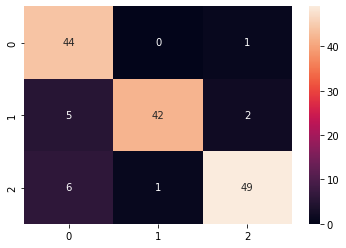

In [30]:
sns.heatmap(cnf, annot = True)

Bản đồ nhiệt **(heatmap)** được sử dụng ở trên là một biểu diễn đồ họa của dữ liệu trong đó bản đồ nhiệt hiển thị dạng bảng số trong đó các lệnh gọi được tô màu tùy thuộc vào giá trị chứa

### Questions 3
Thử nghiệm với 3 siêu tham số có trong bài giảng và viết một bản tóm tắt ngắn về những gì bạn đã học

Trong mô hình học máy là định nghĩa của một công thức toán học với số lượng các tham số cần học từ dữ liệu được thực hiện thông qua một quá trình được gọi là đào tạo mô hình. Ngoài ra, nói cách khác là đào tạo một mô hình với dữ liệu hiện có, chúng tôi có thể phù hợp với mô hình

Có một loại tham số khác không thể học trực tiếp thường xuyên trong quá trình đào tạo, được thể hiện dưới dạng các thuộc tính **'higher-level'** của bất kỳ mô hình nào, chẳng hạn như độ phức tạp của nó hoặc tốc độ học của nó. Tham số này được gọi là **hyper-parameter** (siêu tham số) thường được cố định trước khi quá trình huấn luyện thực sự bắt đầu
1. Hyper-parameter không thể học một cách trực tiếp từ dữ liệu trong quá trình đào tạo mô hình chuẩn và cần được xác định trước
2. Có thể được quyết định bằng cách đặt các giá trị, mô hình đào tạo khác nhau và chọn các giá trị kiểm tra cái nào tốt nhất

**Một số VD về hyper-parameters**
<ul>
    <li>Number of leaves of depth of a tree</li>
    <li>Learning rate</li>
    <li>Hidden layer in ANN</li>
    <li>Number of cluster in K-Means clusting</li>
    <li>Number of latent factors in a matrix factorization</li>
    </ul>

### Experiment first  --- *batch_size = 'auto'*

In [31]:
mlp_first = MLPClassifier(hidden_layer_sizes = 500,
                                activation = 'relu',
                                verbose = 1,
                                solver = 'adam',
                                batch_size = 'auto',
                                learning_rate = 'constant',
                                learning_rate_init = 0.001,
                                max_iter = 1000)

mlp_first = mlp_first.fit(x_train_sampled_data, y_train_sampled_data)

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.05067240
Iteration 2, loss = 0.95998955
Iteration 3, loss = 0.88027363
Iteration 4, loss = 0.81146639
Iteration 5, loss = 0.75328470
Iteration 6, loss = 0.70265829
Iteration 7, loss = 0.66072664
Iteration 8, loss = 0.62479878
Iteration 9, loss = 0.59569509
Iteration 10, loss = 0.57181985
Iteration 11, loss = 0.55218810
Iteration 12, loss = 0.53465203
Iteration 13, loss = 0.52127512
Iteration 14, loss = 0.51084300
Iteration 15, loss = 0.50129623
Iteration 16, loss = 0.49312947
Iteration 17, loss = 0.48635667
Iteration 18, loss = 0.47966043
Iteration 19, loss = 0.47418190
Iteration 20, loss = 0.46918789
Iteration 21, loss = 0.46377470
Iteration 22, loss = 0.45905530
Iteration 23, loss = 0.45444064
Iteration 24, loss = 0.44981557
Iteration 25, loss = 0.44535793
Iteration 26, loss = 0.44115499
Iteration 27, loss = 0.43688398
Iteration 28, loss = 0.43265942
Iteration 29, loss = 0.42892317
Iteration 30, loss = 0.42488860
Iteration 31, loss = 0.42087281
Iteration 32, los

Iteration 261, loss = 0.14383575
Iteration 262, loss = 0.14351282
Iteration 263, loss = 0.14275780
Iteration 264, loss = 0.14265206
Iteration 265, loss = 0.14246127
Iteration 266, loss = 0.14193996
Iteration 267, loss = 0.14156585
Iteration 268, loss = 0.14177128
Iteration 269, loss = 0.14134411
Iteration 270, loss = 0.14124568
Iteration 271, loss = 0.14093006
Iteration 272, loss = 0.14100016
Iteration 273, loss = 0.14019721
Iteration 274, loss = 0.13996161
Iteration 275, loss = 0.13995024
Iteration 276, loss = 0.13948080
Iteration 277, loss = 0.13950605
Iteration 278, loss = 0.13899522
Iteration 279, loss = 0.13888176
Iteration 280, loss = 0.13857336
Iteration 281, loss = 0.13850383
Iteration 282, loss = 0.13804717
Iteration 283, loss = 0.13782908
Iteration 284, loss = 0.13754061
Iteration 285, loss = 0.13762877
Iteration 286, loss = 0.13723865
Iteration 287, loss = 0.13696295
Iteration 288, loss = 0.13673392
Iteration 289, loss = 0.13639683
Iteration 290, loss = 0.13621691
Iteration 

Iteration 522, loss = 0.09769407
Iteration 523, loss = 0.09779961
Iteration 524, loss = 0.09754468
Iteration 525, loss = 0.09745368
Iteration 526, loss = 0.09738171
Iteration 527, loss = 0.09719950
Iteration 528, loss = 0.09811517
Iteration 529, loss = 0.09704472
Iteration 530, loss = 0.09698616
Iteration 531, loss = 0.09694477
Iteration 532, loss = 0.09669344
Iteration 533, loss = 0.09712782
Iteration 534, loss = 0.09665997
Iteration 535, loss = 0.09610807
Iteration 536, loss = 0.09616744
Iteration 537, loss = 0.09604895
Iteration 538, loss = 0.09622326
Iteration 539, loss = 0.09640787
Iteration 540, loss = 0.09561927
Iteration 541, loss = 0.09535893
Iteration 542, loss = 0.09552990
Iteration 543, loss = 0.09525587
Iteration 544, loss = 0.09502623
Iteration 545, loss = 0.09533316
Iteration 546, loss = 0.09486303
Iteration 547, loss = 0.09497242
Iteration 548, loss = 0.09481366
Iteration 549, loss = 0.09544779
Iteration 550, loss = 0.09465410
Iteration 551, loss = 0.09450886
Iteration 

Iteration 786, loss = 0.07334387
Iteration 787, loss = 0.07291128
Iteration 788, loss = 0.07287270
Iteration 789, loss = 0.07273073
Iteration 790, loss = 0.07255129
Iteration 791, loss = 0.07276673
Iteration 792, loss = 0.07281507
Iteration 793, loss = 0.07297161
Iteration 794, loss = 0.07220861
Iteration 795, loss = 0.07244901
Iteration 796, loss = 0.07220181
Iteration 797, loss = 0.07218851
Iteration 798, loss = 0.07214062
Iteration 799, loss = 0.07216216
Iteration 800, loss = 0.07202491
Iteration 801, loss = 0.07165420
Iteration 802, loss = 0.07192352
Iteration 803, loss = 0.07215543
Iteration 804, loss = 0.07150050
Iteration 805, loss = 0.07150917
Iteration 806, loss = 0.07155578
Iteration 807, loss = 0.07143586
Iteration 808, loss = 0.07140037
Iteration 809, loss = 0.07127281
Iteration 810, loss = 0.07123343
Iteration 811, loss = 0.07098447
Iteration 812, loss = 0.07090416
Iteration 813, loss = 0.07089868
Iteration 814, loss = 0.07121159
Iteration 815, loss = 0.07128420
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
yPred_first = mlp_first.predict(x_test_sampled_data)
scores_first = cross_val_score(mlp_first, y_test_sampled_data, yPred_first, cv = 10)

Iteration 1, loss = 1.05588865
Iteration 2, loss = 1.04157991
Iteration 3, loss = 1.02794671
Iteration 4, loss = 1.01501698
Iteration 5, loss = 1.00266830
Iteration 6, loss = 0.99075418
Iteration 7, loss = 0.97934111
Iteration 8, loss = 0.96835022
Iteration 9, loss = 0.95764641
Iteration 10, loss = 0.94726524
Iteration 11, loss = 0.93722834
Iteration 12, loss = 0.92750580
Iteration 13, loss = 0.91807899
Iteration 14, loss = 0.90885373
Iteration 15, loss = 0.89980883
Iteration 16, loss = 0.89095381
Iteration 17, loss = 0.88224397
Iteration 18, loss = 0.87369584
Iteration 19, loss = 0.86543253
Iteration 20, loss = 0.85728378
Iteration 21, loss = 0.84919999
Iteration 22, loss = 0.84124542
Iteration 23, loss = 0.83339449
Iteration 24, loss = 0.82563342
Iteration 25, loss = 0.81797194
Iteration 26, loss = 0.81041587
Iteration 27, loss = 0.80296641
Iteration 28, loss = 0.79559745
Iteration 29, loss = 0.78832137
Iteration 30, loss = 0.78119557
Iteration 31, loss = 0.77410279
Iteration 32, los

Iteration 278, loss = 0.35431613
Iteration 279, loss = 0.35416780
Iteration 280, loss = 0.35402151
Iteration 281, loss = 0.35387983
Iteration 282, loss = 0.35373807
Iteration 283, loss = 0.35359796
Iteration 284, loss = 0.35345949
Iteration 285, loss = 0.35332140
Iteration 286, loss = 0.35318622
Iteration 287, loss = 0.35305551
Iteration 288, loss = 0.35292446
Iteration 289, loss = 0.35279291
Iteration 290, loss = 0.35266376
Iteration 291, loss = 0.35253740
Iteration 292, loss = 0.35241153
Iteration 293, loss = 0.35228971
Iteration 294, loss = 0.35216870
Iteration 295, loss = 0.35204828
Iteration 296, loss = 0.35192813
Iteration 297, loss = 0.35181111
Iteration 298, loss = 0.35169541
Iteration 299, loss = 0.35158157
Iteration 300, loss = 0.35146888
Iteration 301, loss = 0.35135534
Iteration 302, loss = 0.35124517
Iteration 303, loss = 0.35113700
Iteration 304, loss = 0.35102969
Iteration 305, loss = 0.35092254
Iteration 306, loss = 0.35081726
Iteration 307, loss = 0.35071282
Iteration 

Iteration 242, loss = 0.37859421
Iteration 243, loss = 0.37834870
Iteration 244, loss = 0.37810547
Iteration 245, loss = 0.37786194
Iteration 246, loss = 0.37762324
Iteration 247, loss = 0.37738539
Iteration 248, loss = 0.37715266
Iteration 249, loss = 0.37692623
Iteration 250, loss = 0.37670110
Iteration 251, loss = 0.37647918
Iteration 252, loss = 0.37626035
Iteration 253, loss = 0.37604175
Iteration 254, loss = 0.37583004
Iteration 255, loss = 0.37562680
Iteration 256, loss = 0.37542435
Iteration 257, loss = 0.37521805
Iteration 258, loss = 0.37501787
Iteration 259, loss = 0.37482406
Iteration 260, loss = 0.37463265
Iteration 261, loss = 0.37444197
Iteration 262, loss = 0.37425485
Iteration 263, loss = 0.37407346
Iteration 264, loss = 0.37389077
Iteration 265, loss = 0.37371386
Iteration 266, loss = 0.37353893
Iteration 267, loss = 0.37336371
Iteration 268, loss = 0.37319466
Iteration 269, loss = 0.37302647
Iteration 270, loss = 0.37285851
Iteration 271, loss = 0.37269725
Iteration 

Iteration 201, loss = 0.38561895
Iteration 202, loss = 0.38508698
Iteration 203, loss = 0.38456451
Iteration 204, loss = 0.38404943
Iteration 205, loss = 0.38353734
Iteration 206, loss = 0.38302607
Iteration 207, loss = 0.38253676
Iteration 208, loss = 0.38205160
Iteration 209, loss = 0.38157372
Iteration 210, loss = 0.38110224
Iteration 211, loss = 0.38063119
Iteration 212, loss = 0.38017387
Iteration 213, loss = 0.37972607
Iteration 214, loss = 0.37927934
Iteration 215, loss = 0.37883504
Iteration 216, loss = 0.37839330
Iteration 217, loss = 0.37797429
Iteration 218, loss = 0.37755995
Iteration 219, loss = 0.37714064
Iteration 220, loss = 0.37673938
Iteration 221, loss = 0.37633738
Iteration 222, loss = 0.37592965
Iteration 223, loss = 0.37554278
Iteration 224, loss = 0.37515545
Iteration 225, loss = 0.37477348
Iteration 226, loss = 0.37440093
Iteration 227, loss = 0.37403467
Iteration 228, loss = 0.37367801
Iteration 229, loss = 0.37331543
Iteration 230, loss = 0.37295963
Iteration 

Iteration 134, loss = 0.44285043
Iteration 135, loss = 0.44144331
Iteration 136, loss = 0.44007463
Iteration 137, loss = 0.43872179
Iteration 138, loss = 0.43737261
Iteration 139, loss = 0.43603322
Iteration 140, loss = 0.43475941
Iteration 141, loss = 0.43346987
Iteration 142, loss = 0.43218740
Iteration 143, loss = 0.43092541
Iteration 144, loss = 0.42970769
Iteration 145, loss = 0.42849327
Iteration 146, loss = 0.42729174
Iteration 147, loss = 0.42609971
Iteration 148, loss = 0.42494614
Iteration 149, loss = 0.42381797
Iteration 150, loss = 0.42270022
Iteration 151, loss = 0.42157831
Iteration 152, loss = 0.42047038
Iteration 153, loss = 0.41938487
Iteration 154, loss = 0.41831396
Iteration 155, loss = 0.41723116
Iteration 156, loss = 0.41618412
Iteration 157, loss = 0.41517852
Iteration 158, loss = 0.41416921
Iteration 159, loss = 0.41316580
Iteration 160, loss = 0.41220218
Iteration 161, loss = 0.41123786
Iteration 162, loss = 0.41025258
Iteration 163, loss = 0.40932581
Iteration 

Iteration 66, loss = 0.64918622
Iteration 67, loss = 0.64524217
Iteration 68, loss = 0.64135856
Iteration 69, loss = 0.63754047
Iteration 70, loss = 0.63379958
Iteration 71, loss = 0.63014250
Iteration 72, loss = 0.62649329
Iteration 73, loss = 0.62290153
Iteration 74, loss = 0.61940509
Iteration 75, loss = 0.61591439
Iteration 76, loss = 0.61245149
Iteration 77, loss = 0.60908006
Iteration 78, loss = 0.60572640
Iteration 79, loss = 0.60244525
Iteration 80, loss = 0.59919301
Iteration 81, loss = 0.59599338
Iteration 82, loss = 0.59284101
Iteration 83, loss = 0.58973503
Iteration 84, loss = 0.58668334
Iteration 85, loss = 0.58368026
Iteration 86, loss = 0.58072235
Iteration 87, loss = 0.57777933
Iteration 88, loss = 0.57490598
Iteration 89, loss = 0.57210595
Iteration 90, loss = 0.56934663
Iteration 91, loss = 0.56656337
Iteration 92, loss = 0.56385075
Iteration 93, loss = 0.56122602
Iteration 94, loss = 0.55859813
Iteration 95, loss = 0.55595382
Iteration 96, loss = 0.55338893
Iteratio

Iteration 354, loss = 0.33898680
Iteration 355, loss = 0.33885795
Iteration 356, loss = 0.33872793
Iteration 357, loss = 0.33859855
Iteration 358, loss = 0.33847077
Iteration 359, loss = 0.33834165
Iteration 360, loss = 0.33821574
Iteration 361, loss = 0.33809359
Iteration 362, loss = 0.33797436
Iteration 363, loss = 0.33785287
Iteration 364, loss = 0.33772968
Iteration 365, loss = 0.33761001
Iteration 366, loss = 0.33749153
Iteration 367, loss = 0.33737406
Iteration 368, loss = 0.33725782
Iteration 369, loss = 0.33714018
Iteration 370, loss = 0.33702631
Iteration 371, loss = 0.33691346
Iteration 372, loss = 0.33680150
Iteration 373, loss = 0.33669207
Iteration 374, loss = 0.33658238
Iteration 375, loss = 0.33647226
Iteration 376, loss = 0.33636406
Iteration 377, loss = 0.33625711
Iteration 378, loss = 0.33615000
Iteration 379, loss = 0.33604373
Iteration 380, loss = 0.33594027
Iteration 381, loss = 0.33583772
Iteration 382, loss = 0.33573497
Iteration 383, loss = 0.33563367
Iteration 

Iteration 233, loss = 0.38320643
Iteration 234, loss = 0.38289921
Iteration 235, loss = 0.38259654
Iteration 236, loss = 0.38230088
Iteration 237, loss = 0.38200560
Iteration 238, loss = 0.38171174
Iteration 239, loss = 0.38142887
Iteration 240, loss = 0.38115643
Iteration 241, loss = 0.38088476
Iteration 242, loss = 0.38061147
Iteration 243, loss = 0.38034155
Iteration 244, loss = 0.38008113
Iteration 245, loss = 0.37982604
Iteration 246, loss = 0.37957723
Iteration 247, loss = 0.37932820
Iteration 248, loss = 0.37908374
Iteration 249, loss = 0.37884131
Iteration 250, loss = 0.37859847
Iteration 251, loss = 0.37836352
Iteration 252, loss = 0.37813448
Iteration 253, loss = 0.37791091
Iteration 254, loss = 0.37768972
Iteration 255, loss = 0.37746952
Iteration 256, loss = 0.37725446
Iteration 257, loss = 0.37703926
Iteration 258, loss = 0.37682786
Iteration 259, loss = 0.37662093
Iteration 260, loss = 0.37641594
Iteration 261, loss = 0.37621388
Iteration 262, loss = 0.37601458
Iteration 

Iteration 180, loss = 0.36166320
Iteration 181, loss = 0.36087426
Iteration 182, loss = 0.36008480
Iteration 183, loss = 0.35930860
Iteration 184, loss = 0.35853714
Iteration 185, loss = 0.35777312
Iteration 186, loss = 0.35701717
Iteration 187, loss = 0.35627239
Iteration 188, loss = 0.35554202
Iteration 189, loss = 0.35482218
Iteration 190, loss = 0.35412927
Iteration 191, loss = 0.35342710
Iteration 192, loss = 0.35272441
Iteration 193, loss = 0.35206050
Iteration 194, loss = 0.35139169
Iteration 195, loss = 0.35071180
Iteration 196, loss = 0.35004363
Iteration 197, loss = 0.34939883
Iteration 198, loss = 0.34876616
Iteration 199, loss = 0.34813881
Iteration 200, loss = 0.34752933
Iteration 201, loss = 0.34691797
Iteration 202, loss = 0.34629893
Iteration 203, loss = 0.34570846
Iteration 204, loss = 0.34512509
Iteration 205, loss = 0.34455989
Iteration 206, loss = 0.34398621
Iteration 207, loss = 0.34341920
Iteration 208, loss = 0.34286399
Iteration 209, loss = 0.34232625
Iteration 

Iteration 85, loss = 0.55907250
Iteration 86, loss = 0.55592948
Iteration 87, loss = 0.55282090
Iteration 88, loss = 0.54976681
Iteration 89, loss = 0.54675014
Iteration 90, loss = 0.54381193
Iteration 91, loss = 0.54090557
Iteration 92, loss = 0.53802106
Iteration 93, loss = 0.53517388
Iteration 94, loss = 0.53238925
Iteration 95, loss = 0.52963579
Iteration 96, loss = 0.52689598
Iteration 97, loss = 0.52420741
Iteration 98, loss = 0.52157842
Iteration 99, loss = 0.51899693
Iteration 100, loss = 0.51647058
Iteration 101, loss = 0.51396548
Iteration 102, loss = 0.51150723
Iteration 103, loss = 0.50907405
Iteration 104, loss = 0.50668027
Iteration 105, loss = 0.50434687
Iteration 106, loss = 0.50203734
Iteration 107, loss = 0.49974880
Iteration 108, loss = 0.49751916
Iteration 109, loss = 0.49528366
Iteration 110, loss = 0.49307107
Iteration 111, loss = 0.49094163
Iteration 112, loss = 0.48882339
Iteration 113, loss = 0.48673924
Iteration 114, loss = 0.48467346
Iteration 115, loss = 0.4

Iteration 38, loss = 0.74476577
Iteration 39, loss = 0.73824171
Iteration 40, loss = 0.73178699
Iteration 41, loss = 0.72548926
Iteration 42, loss = 0.71926262
Iteration 43, loss = 0.71310335
Iteration 44, loss = 0.70702942
Iteration 45, loss = 0.70104604
Iteration 46, loss = 0.69512338
Iteration 47, loss = 0.68926948
Iteration 48, loss = 0.68351792
Iteration 49, loss = 0.67787508
Iteration 50, loss = 0.67231729
Iteration 51, loss = 0.66679842
Iteration 52, loss = 0.66134623
Iteration 53, loss = 0.65596988
Iteration 54, loss = 0.65063440
Iteration 55, loss = 0.64539985
Iteration 56, loss = 0.64026631
Iteration 57, loss = 0.63521091
Iteration 58, loss = 0.63023159
Iteration 59, loss = 0.62529876
Iteration 60, loss = 0.62042301
Iteration 61, loss = 0.61565622
Iteration 62, loss = 0.61095287
Iteration 63, loss = 0.60632798
Iteration 64, loss = 0.60177583
Iteration 65, loss = 0.59732546
Iteration 66, loss = 0.59291463
Iteration 67, loss = 0.58850972
Iteration 68, loss = 0.58418944
Iteratio

Iteration 315, loss = 0.29772505
Iteration 316, loss = 0.29762238
Iteration 317, loss = 0.29752167
Iteration 318, loss = 0.29742353
Iteration 319, loss = 0.29732455
Iteration 320, loss = 0.29722742
Iteration 321, loss = 0.29713539
Iteration 322, loss = 0.29704306
Iteration 323, loss = 0.29695095
Iteration 324, loss = 0.29686042
Iteration 325, loss = 0.29677377
Iteration 326, loss = 0.29668794
Iteration 327, loss = 0.29660282
Iteration 328, loss = 0.29651817
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.09730214
Iteration 2, loss = 1.08036609
Iteration 3, loss = 1.06431244
Iteration 4, loss = 1.04907852
Iteration 5, loss = 1.03474428
Iteration 6, loss = 1.02117206
Iteration 7, loss = 1.00833729
Iteration 8, loss = 0.99618667
Iteration 9, loss = 0.98463363
Iteration 10, loss = 0.97367035
Iteration 11, loss = 0.96327345
Iteration 12, loss = 0.95322181
Iteration 13, loss = 0.94352998
Iteration 14, loss = 0.93420710
Iteration

Iteration 264, loss = 0.32883258
Iteration 265, loss = 0.32855359
Iteration 266, loss = 0.32827912
Iteration 267, loss = 0.32800985
Iteration 268, loss = 0.32774239
Iteration 269, loss = 0.32748568
Iteration 270, loss = 0.32722826
Iteration 271, loss = 0.32697415
Iteration 272, loss = 0.32672319
Iteration 273, loss = 0.32647356
Iteration 274, loss = 0.32622654
Iteration 275, loss = 0.32598565
Iteration 276, loss = 0.32574874
Iteration 277, loss = 0.32551016
Iteration 278, loss = 0.32527882
Iteration 279, loss = 0.32504967
Iteration 280, loss = 0.32482499
Iteration 281, loss = 0.32460169
Iteration 282, loss = 0.32437859
Iteration 283, loss = 0.32415962
Iteration 284, loss = 0.32394740
Iteration 285, loss = 0.32373499
Iteration 286, loss = 0.32352262
Iteration 287, loss = 0.32331658
Iteration 288, loss = 0.32311215
Iteration 289, loss = 0.32290999
Iteration 290, loss = 0.32270873
Iteration 291, loss = 0.32251382
Iteration 292, loss = 0.32232065
Iteration 293, loss = 0.32213147
Iteration 

In [33]:
y_predicted_first = np.array(mlp_first.predict(x_test_sampled_data))
y_right_first = np.array(y_test_sampled_data)

cnf_first = confusion_matrix(y_right_first, y_predicted_first)
np.set_printoptions(precision = 2)
cnf_first

array([[44,  0,  1],
       [ 5, 43,  1],
       [ 6,  1, 49]], dtype=int64)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        45
           1       0.98      0.88      0.92        49
           2       0.96      0.88      0.92        56

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150



<AxesSubplot:>

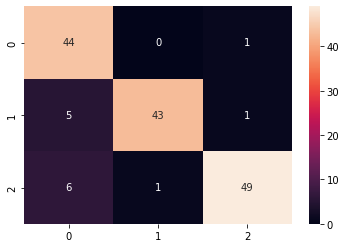

In [34]:
print(classification_report(y_right_first, y_predicted_first))
sns.heatmap(cnf_first, annot = True)

### Experiment second 

**batch_size = 'auto'**\
**solver = 'sgd'**\
**hidden_layer_sizes = 350**\
**learning_rate = 'adaptive'** : thích nghi có nghĩa là thích ứng đề cập đến việc các gen của bạn trong tỷ lệ học tập phải nhỏ

In [35]:
mlp_second = MLPClassifier(hidden_layer_sizes = 350,
                                activation = 'relu',
                                verbose = 1,
                                solver = 'sgd',
                                batch_size = 'auto',
                                learning_rate = 'adaptive',
                                learning_rate_init = 0.001,
                                max_iter = 1000)

mlp_second = mlp_second.fit(x_train_sampled_data, y_train_sampled_data)

Iteration 1, loss = 1.02872937
Iteration 2, loss = 1.02200504
Iteration 3, loss = 1.01188959
Iteration 4, loss = 0.99963534


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 5, loss = 0.98581038
Iteration 6, loss = 0.97139480
Iteration 7, loss = 0.95658218
Iteration 8, loss = 0.94133686
Iteration 9, loss = 0.92648754
Iteration 10, loss = 0.91207147
Iteration 11, loss = 0.89787045
Iteration 12, loss = 0.88435336
Iteration 13, loss = 0.87088997
Iteration 14, loss = 0.85835799
Iteration 15, loss = 0.84602289
Iteration 16, loss = 0.83466266
Iteration 17, loss = 0.82332083
Iteration 18, loss = 0.81266712
Iteration 19, loss = 0.80241349
Iteration 20, loss = 0.79269273
Iteration 21, loss = 0.78351212
Iteration 22, loss = 0.77428874
Iteration 23, loss = 0.76570364
Iteration 24, loss = 0.75756736
Iteration 25, loss = 0.74961391
Iteration 26, loss = 0.74207570
Iteration 27, loss = 0.73486434
Iteration 28, loss = 0.72786838
Iteration 29, loss = 0.72125281
Iteration 30, loss = 0.71474938
Iteration 31, loss = 0.70857198
Iteration 32, loss = 0.70240066
Iteration 33, loss = 0.69676205
Iteration 34, loss = 0.69125048
Iteration 35, loss = 0.68594895
Iteration 36,

Iteration 259, loss = 0.45908278
Iteration 260, loss = 0.45877146
Iteration 261, loss = 0.45851609
Iteration 262, loss = 0.45822949
Iteration 263, loss = 0.45799894
Iteration 264, loss = 0.45768916
Iteration 265, loss = 0.45745050
Iteration 266, loss = 0.45718761
Iteration 267, loss = 0.45692964
Iteration 268, loss = 0.45664473
Iteration 269, loss = 0.45637851
Iteration 270, loss = 0.45612755
Iteration 271, loss = 0.45589500
Iteration 272, loss = 0.45560897
Iteration 273, loss = 0.45535668
Iteration 274, loss = 0.45508930
Iteration 275, loss = 0.45485047
Iteration 276, loss = 0.45458534
Iteration 277, loss = 0.45435402
Iteration 278, loss = 0.45409592
Iteration 279, loss = 0.45382974
Iteration 280, loss = 0.45357266
Iteration 281, loss = 0.45334512
Iteration 282, loss = 0.45308879
Iteration 283, loss = 0.45283540
Iteration 284, loss = 0.45257205
Iteration 285, loss = 0.45233209
Iteration 286, loss = 0.45208148
Iteration 287, loss = 0.45183863
Iteration 288, loss = 0.45160156
Iteration 

Iteration 523, loss = 0.40514482
Iteration 524, loss = 0.40497749
Iteration 525, loss = 0.40480906
Iteration 526, loss = 0.40462445
Iteration 527, loss = 0.40447008
Iteration 528, loss = 0.40429226
Iteration 529, loss = 0.40414301
Iteration 530, loss = 0.40399325
Iteration 531, loss = 0.40379185
Iteration 532, loss = 0.40362511
Iteration 533, loss = 0.40348119
Iteration 534, loss = 0.40331373
Iteration 535, loss = 0.40312544
Iteration 536, loss = 0.40297551
Iteration 537, loss = 0.40279510
Iteration 538, loss = 0.40264311
Iteration 539, loss = 0.40248687
Iteration 540, loss = 0.40233975
Iteration 541, loss = 0.40215391
Iteration 542, loss = 0.40198801
Iteration 543, loss = 0.40182745
Iteration 544, loss = 0.40165755
Iteration 545, loss = 0.40149716
Iteration 546, loss = 0.40134479
Iteration 547, loss = 0.40116004
Iteration 548, loss = 0.40101064
Iteration 549, loss = 0.40083396
Iteration 550, loss = 0.40069839
Iteration 551, loss = 0.40052498
Iteration 552, loss = 0.40035751
Iteration 

Iteration 782, loss = 0.36753088
Iteration 783, loss = 0.36740771
Iteration 784, loss = 0.36727586
Iteration 785, loss = 0.36715285
Iteration 786, loss = 0.36702622
Iteration 787, loss = 0.36689886
Iteration 788, loss = 0.36677339
Iteration 789, loss = 0.36664807
Iteration 790, loss = 0.36652250
Iteration 791, loss = 0.36639742
Iteration 792, loss = 0.36626580
Iteration 793, loss = 0.36615908
Iteration 794, loss = 0.36601054
Iteration 795, loss = 0.36589635
Iteration 796, loss = 0.36576816
Iteration 797, loss = 0.36565830
Iteration 798, loss = 0.36551079
Iteration 799, loss = 0.36540357
Iteration 800, loss = 0.36527196
Iteration 801, loss = 0.36513935
Iteration 802, loss = 0.36501755
Iteration 803, loss = 0.36488815
Iteration 804, loss = 0.36476752
Iteration 805, loss = 0.36463916
Iteration 806, loss = 0.36451840
Iteration 807, loss = 0.36439223
Iteration 808, loss = 0.36426303
Iteration 809, loss = 0.36414799
Iteration 810, loss = 0.36401675
Iteration 811, loss = 0.36391324
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
yPred_second = mlp_second.predict(x_test_sampled_data)
scores_second = cross_val_score(mlp_second, y_test_sampled_data, yPred_second, cv = 10)

Iteration 1, loss = 1.10000653
Iteration 2, loss = 1.09940453
Iteration 3, loss = 1.09854995
Iteration 4, loss = 1.09747215
Iteration 5, loss = 1.09619830
Iteration 6, loss = 1.09475669
Iteration 7, loss = 1.09316717
Iteration 8, loss = 1.09145041
Iteration 9, loss = 1.08962545
Iteration 10, loss = 1.08771028
Iteration 11, loss = 1.08572035
Iteration 12, loss = 1.08367140
Iteration 13, loss = 1.08157734
Iteration 14, loss = 1.07944630
Iteration 15, loss = 1.07728807
Iteration 16, loss = 1.07511461
Iteration 17, loss = 1.07293623
Iteration 18, loss = 1.07075051
Iteration 19, loss = 1.06857422
Iteration 20, loss = 1.06639792
Iteration 21, loss = 1.06423997
Iteration 22, loss = 1.06214526
Iteration 23, loss = 1.06007651
Iteration 24, loss = 1.05806295
Iteration 25, loss = 1.05607887
Iteration 26, loss = 1.05411839
Iteration 27, loss = 1.05218090
Iteration 28, loss = 1.05026889
Iteration 29, loss = 1.04838433
Iteration 30, loss = 1.04653580
Iteration 31, loss = 1.04471812
Iteration 32, los

Iteration 268, loss = 0.87714079
Iteration 269, loss = 0.87676201
Iteration 270, loss = 0.87638248
Iteration 271, loss = 0.87600355
Iteration 272, loss = 0.87562679
Iteration 273, loss = 0.87525337
Iteration 274, loss = 0.87487946
Iteration 275, loss = 0.87450547
Iteration 276, loss = 0.87413747
Iteration 277, loss = 0.87376583
Iteration 278, loss = 0.87339619
Iteration 279, loss = 0.87302833
Iteration 280, loss = 0.87266106
Iteration 281, loss = 0.87229608
Iteration 282, loss = 0.87192982
Iteration 283, loss = 0.87156670
Iteration 284, loss = 0.87120591
Iteration 285, loss = 0.87084161
Iteration 286, loss = 0.87048256
Iteration 287, loss = 0.87012288
Iteration 288, loss = 0.86976444
Iteration 289, loss = 0.86940669
Iteration 290, loss = 0.86905173
Iteration 291, loss = 0.86869642
Iteration 292, loss = 0.86834492
Iteration 293, loss = 0.86799265
Iteration 294, loss = 0.86764119
Iteration 295, loss = 0.86729356
Iteration 296, loss = 0.86694488
Iteration 297, loss = 0.86659809
Iteration 

Iteration 524, loss = 0.80966823
Iteration 525, loss = 0.80948405
Iteration 526, loss = 0.80930111
Iteration 527, loss = 0.80911935
Iteration 528, loss = 0.80893564
Iteration 529, loss = 0.80875763
Iteration 530, loss = 0.80857443
Iteration 531, loss = 0.80839395
Iteration 532, loss = 0.80821528
Iteration 533, loss = 0.80803513
Iteration 534, loss = 0.80785529
Iteration 535, loss = 0.80767629
Iteration 536, loss = 0.80749700
Iteration 537, loss = 0.80731874
Iteration 538, loss = 0.80714090
Iteration 539, loss = 0.80696190
Iteration 540, loss = 0.80678463
Iteration 541, loss = 0.80660816
Iteration 542, loss = 0.80643234
Iteration 543, loss = 0.80625594
Iteration 544, loss = 0.80607956
Iteration 545, loss = 0.80590471
Iteration 546, loss = 0.80572990
Iteration 547, loss = 0.80555575
Iteration 548, loss = 0.80538027
Iteration 549, loss = 0.80520808
Iteration 550, loss = 0.80503433
Iteration 551, loss = 0.80485997
Iteration 552, loss = 0.80468641
Iteration 553, loss = 0.80451492
Iteration 

Iteration 865, loss = 0.76259855
Iteration 866, loss = 0.76248662
Iteration 867, loss = 0.76237472
Iteration 868, loss = 0.76226278
Iteration 869, loss = 0.76214999
Iteration 870, loss = 0.76203726
Iteration 871, loss = 0.76192685
Iteration 872, loss = 0.76181540
Iteration 873, loss = 0.76170358
Iteration 874, loss = 0.76159107
Iteration 875, loss = 0.76148083
Iteration 876, loss = 0.76136794
Iteration 877, loss = 0.76125805
Iteration 878, loss = 0.76114653
Iteration 879, loss = 0.76103564
Iteration 880, loss = 0.76092241
Iteration 881, loss = 0.76081316
Iteration 882, loss = 0.76070206
Iteration 883, loss = 0.76058996
Iteration 884, loss = 0.76047937
Iteration 885, loss = 0.76036997
Iteration 886, loss = 0.76025888
Iteration 887, loss = 0.76014763
Iteration 888, loss = 0.76003629
Iteration 889, loss = 0.75992471
Iteration 890, loss = 0.75981804
Iteration 891, loss = 0.75970421
Iteration 892, loss = 0.75959522
Iteration 893, loss = 0.75948386
Iteration 894, loss = 0.75937361
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 110, loss = 0.98469256
Iteration 111, loss = 0.98405266
Iteration 112, loss = 0.98342366
Iteration 113, loss = 0.98279729
Iteration 114, loss = 0.98217494
Iteration 115, loss = 0.98156411
Iteration 116, loss = 0.98095543
Iteration 117, loss = 0.98034862
Iteration 118, loss = 0.97974444
Iteration 119, loss = 0.97914199
Iteration 120, loss = 0.97854007
Iteration 121, loss = 0.97794133
Iteration 122, loss = 0.97734560
Iteration 123, loss = 0.97675200
Iteration 124, loss = 0.97615949
Iteration 125, loss = 0.97556926
Iteration 126, loss = 0.97498123
Iteration 127, loss = 0.97439705
Iteration 128, loss = 0.97381445
Iteration 129, loss = 0.97323352
Iteration 130, loss = 0.97265497
Iteration 131, loss = 0.97207718
Iteration 132, loss = 0.97150204
Iteration 133, loss = 0.97092833
Iteration 134, loss = 0.97035766
Iteration 135, loss = 0.96979002
Iteration 136, loss = 0.96922134
Iteration 137, loss = 0.96865723
Iteration 138, loss = 0.96809397
Iteration 139, loss = 0.96753512
Iteration 

Iteration 376, loss = 0.87493248
Iteration 377, loss = 0.87466179
Iteration 378, loss = 0.87439144
Iteration 379, loss = 0.87412097
Iteration 380, loss = 0.87385065
Iteration 381, loss = 0.87358173
Iteration 382, loss = 0.87331070
Iteration 383, loss = 0.87304651
Iteration 384, loss = 0.87277687
Iteration 385, loss = 0.87251049
Iteration 386, loss = 0.87224441
Iteration 387, loss = 0.87197905
Iteration 388, loss = 0.87171371
Iteration 389, loss = 0.87144920
Iteration 390, loss = 0.87118571
Iteration 391, loss = 0.87092274
Iteration 392, loss = 0.87065944
Iteration 393, loss = 0.87039936
Iteration 394, loss = 0.87013624
Iteration 395, loss = 0.86987456
Iteration 396, loss = 0.86961485
Iteration 397, loss = 0.86935661
Iteration 398, loss = 0.86909828
Iteration 399, loss = 0.86883810
Iteration 400, loss = 0.86858042
Iteration 401, loss = 0.86832416
Iteration 402, loss = 0.86806625
Iteration 403, loss = 0.86780970
Iteration 404, loss = 0.86755522
Iteration 405, loss = 0.86730021
Iteration 

Iteration 671, loss = 0.81455780
Iteration 672, loss = 0.81440179
Iteration 673, loss = 0.81424736
Iteration 674, loss = 0.81409551
Iteration 675, loss = 0.81394338
Iteration 676, loss = 0.81378960
Iteration 677, loss = 0.81363613
Iteration 678, loss = 0.81348580
Iteration 679, loss = 0.81333247
Iteration 680, loss = 0.81318028
Iteration 681, loss = 0.81303093
Iteration 682, loss = 0.81288044
Iteration 683, loss = 0.81272916
Iteration 684, loss = 0.81258000
Iteration 685, loss = 0.81242625
Iteration 686, loss = 0.81227756
Iteration 687, loss = 0.81212846
Iteration 688, loss = 0.81198007
Iteration 689, loss = 0.81183098
Iteration 690, loss = 0.81168044
Iteration 691, loss = 0.81153245
Iteration 692, loss = 0.81138286
Iteration 693, loss = 0.81123419
Iteration 694, loss = 0.81108548
Iteration 695, loss = 0.81093757
Iteration 696, loss = 0.81078978
Iteration 697, loss = 0.81064212
Iteration 698, loss = 0.81049659
Iteration 699, loss = 0.81034755
Iteration 700, loss = 0.81020041
Iteration 

Iteration 925, loss = 0.78089616
Iteration 926, loss = 0.78077606
Iteration 927, loss = 0.78065787
Iteration 928, loss = 0.78053866
Iteration 929, loss = 0.78042179
Iteration 930, loss = 0.78030349
Iteration 931, loss = 0.78018274
Iteration 932, loss = 0.78006760
Iteration 933, loss = 0.77994994
Iteration 934, loss = 0.77983219
Iteration 935, loss = 0.77971294
Iteration 936, loss = 0.77959747
Iteration 937, loss = 0.77947854
Iteration 938, loss = 0.77936047
Iteration 939, loss = 0.77924282
Iteration 940, loss = 0.77912640
Iteration 941, loss = 0.77900976
Iteration 942, loss = 0.77889151
Iteration 943, loss = 0.77877479
Iteration 944, loss = 0.77865773
Iteration 945, loss = 0.77854146
Iteration 946, loss = 0.77842205
Iteration 947, loss = 0.77830837
Iteration 948, loss = 0.77818842
Iteration 949, loss = 0.77807366
Iteration 950, loss = 0.77795529
Iteration 951, loss = 0.77783902
Iteration 952, loss = 0.77772359
Iteration 953, loss = 0.77760515
Iteration 954, loss = 0.77748908
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 107, loss = 0.95756594
Iteration 108, loss = 0.95687515
Iteration 109, loss = 0.95618510
Iteration 110, loss = 0.95549980
Iteration 111, loss = 0.95481579
Iteration 112, loss = 0.95413492
Iteration 113, loss = 0.95345858
Iteration 114, loss = 0.95278684
Iteration 115, loss = 0.95211858
Iteration 116, loss = 0.95145244
Iteration 117, loss = 0.95078791
Iteration 118, loss = 0.95012585
Iteration 119, loss = 0.94946593
Iteration 120, loss = 0.94881151
Iteration 121, loss = 0.94815841
Iteration 122, loss = 0.94750725
Iteration 123, loss = 0.94686900
Iteration 124, loss = 0.94623429
Iteration 125, loss = 0.94560134
Iteration 126, loss = 0.94497047
Iteration 127, loss = 0.94434262
Iteration 128, loss = 0.94371535
Iteration 129, loss = 0.94308942
Iteration 130, loss = 0.94247367
Iteration 131, loss = 0.94186224
Iteration 132, loss = 0.94125848
Iteration 133, loss = 0.94065845
Iteration 134, loss = 0.94005849
Iteration 135, loss = 0.93946065
Iteration 136, loss = 0.93886604
Iteration 

Iteration 374, loss = 0.84694748
Iteration 375, loss = 0.84669328
Iteration 376, loss = 0.84644068
Iteration 377, loss = 0.84618803
Iteration 378, loss = 0.84593715
Iteration 379, loss = 0.84568586
Iteration 380, loss = 0.84543584
Iteration 381, loss = 0.84518696
Iteration 382, loss = 0.84493784
Iteration 383, loss = 0.84468984
Iteration 384, loss = 0.84444242
Iteration 385, loss = 0.84419677
Iteration 386, loss = 0.84395362
Iteration 387, loss = 0.84371474
Iteration 388, loss = 0.84347647
Iteration 389, loss = 0.84323994
Iteration 390, loss = 0.84300289
Iteration 391, loss = 0.84276674
Iteration 392, loss = 0.84253086
Iteration 393, loss = 0.84229657
Iteration 394, loss = 0.84206185
Iteration 395, loss = 0.84182778
Iteration 396, loss = 0.84159504
Iteration 397, loss = 0.84136103
Iteration 398, loss = 0.84113054
Iteration 399, loss = 0.84089776
Iteration 400, loss = 0.84066713
Iteration 401, loss = 0.84043730
Iteration 402, loss = 0.84020644
Iteration 403, loss = 0.83997965
Iteration 

Iteration 640, loss = 0.79861923
Iteration 641, loss = 0.79848182
Iteration 642, loss = 0.79834477
Iteration 643, loss = 0.79820786
Iteration 644, loss = 0.79807045
Iteration 645, loss = 0.79793358
Iteration 646, loss = 0.79779745
Iteration 647, loss = 0.79766084
Iteration 648, loss = 0.79752511
Iteration 649, loss = 0.79738890
Iteration 650, loss = 0.79725275
Iteration 651, loss = 0.79711832
Iteration 652, loss = 0.79698163
Iteration 653, loss = 0.79684687
Iteration 654, loss = 0.79671159
Iteration 655, loss = 0.79657725
Iteration 656, loss = 0.79644130
Iteration 657, loss = 0.79630726
Iteration 658, loss = 0.79617327
Iteration 659, loss = 0.79603869
Iteration 660, loss = 0.79590448
Iteration 661, loss = 0.79577220
Iteration 662, loss = 0.79563674
Iteration 663, loss = 0.79550390
Iteration 664, loss = 0.79537029
Iteration 665, loss = 0.79523774
Iteration 666, loss = 0.79510429
Iteration 667, loss = 0.79497222
Iteration 668, loss = 0.79483962
Iteration 669, loss = 0.79470776
Iteration 

Iteration 890, loss = 0.76793073
Iteration 891, loss = 0.76782322
Iteration 892, loss = 0.76771944
Iteration 893, loss = 0.76761349
Iteration 894, loss = 0.76750630
Iteration 895, loss = 0.76739984
Iteration 896, loss = 0.76729444
Iteration 897, loss = 0.76718789
Iteration 898, loss = 0.76708258
Iteration 899, loss = 0.76697664
Iteration 900, loss = 0.76687030
Iteration 901, loss = 0.76676619
Iteration 902, loss = 0.76665901
Iteration 903, loss = 0.76655377
Iteration 904, loss = 0.76644914
Iteration 905, loss = 0.76634441
Iteration 906, loss = 0.76623764
Iteration 907, loss = 0.76613294
Iteration 908, loss = 0.76602625
Iteration 909, loss = 0.76592264
Iteration 910, loss = 0.76581793
Iteration 911, loss = 0.76571113
Iteration 912, loss = 0.76560688
Iteration 913, loss = 0.76550255
Iteration 914, loss = 0.76539748
Iteration 915, loss = 0.76529360
Iteration 916, loss = 0.76519038
Iteration 917, loss = 0.76508721
Iteration 918, loss = 0.76498379
Iteration 919, loss = 0.76487964
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 113, loss = 0.97301485
Iteration 114, loss = 0.97224661
Iteration 115, loss = 0.97148422
Iteration 116, loss = 0.97072383
Iteration 117, loss = 0.96997527
Iteration 118, loss = 0.96922944
Iteration 119, loss = 0.96848531
Iteration 120, loss = 0.96774678
Iteration 121, loss = 0.96700896
Iteration 122, loss = 0.96627543
Iteration 123, loss = 0.96554592
Iteration 124, loss = 0.96482022
Iteration 125, loss = 0.96409663
Iteration 126, loss = 0.96337525
Iteration 127, loss = 0.96265752
Iteration 128, loss = 0.96194249
Iteration 129, loss = 0.96122924
Iteration 130, loss = 0.96051870
Iteration 131, loss = 0.95981356
Iteration 132, loss = 0.95911223
Iteration 133, loss = 0.95841320
Iteration 134, loss = 0.95771869
Iteration 135, loss = 0.95702658
Iteration 136, loss = 0.95633759
Iteration 137, loss = 0.95565264
Iteration 138, loss = 0.95497300
Iteration 139, loss = 0.95429585
Iteration 140, loss = 0.95362053
Iteration 141, loss = 0.95294933
Iteration 142, loss = 0.95228247
Iteration 

Iteration 376, loss = 0.84734787
Iteration 377, loss = 0.84705588
Iteration 378, loss = 0.84676373
Iteration 379, loss = 0.84647301
Iteration 380, loss = 0.84618408
Iteration 381, loss = 0.84589448
Iteration 382, loss = 0.84560665
Iteration 383, loss = 0.84531828
Iteration 384, loss = 0.84503258
Iteration 385, loss = 0.84474676
Iteration 386, loss = 0.84446255
Iteration 387, loss = 0.84417633
Iteration 388, loss = 0.84389317
Iteration 389, loss = 0.84361069
Iteration 390, loss = 0.84332886
Iteration 391, loss = 0.84304705
Iteration 392, loss = 0.84276660
Iteration 393, loss = 0.84248740
Iteration 394, loss = 0.84220905
Iteration 395, loss = 0.84193247
Iteration 396, loss = 0.84165601
Iteration 397, loss = 0.84138085
Iteration 398, loss = 0.84110502
Iteration 399, loss = 0.84083034
Iteration 400, loss = 0.84055634
Iteration 401, loss = 0.84028562
Iteration 402, loss = 0.84001126
Iteration 403, loss = 0.83973929
Iteration 404, loss = 0.83946756
Iteration 405, loss = 0.83919798
Iteration 

Iteration 705, loss = 0.78292127
Iteration 706, loss = 0.78278242
Iteration 707, loss = 0.78264479
Iteration 708, loss = 0.78250558
Iteration 709, loss = 0.78236786
Iteration 710, loss = 0.78222868
Iteration 711, loss = 0.78209032
Iteration 712, loss = 0.78195421
Iteration 713, loss = 0.78181584
Iteration 714, loss = 0.78167837
Iteration 715, loss = 0.78154062
Iteration 716, loss = 0.78140330
Iteration 717, loss = 0.78126829
Iteration 718, loss = 0.78112860
Iteration 719, loss = 0.78099273
Iteration 720, loss = 0.78085537
Iteration 721, loss = 0.78071868
Iteration 722, loss = 0.78058337
Iteration 723, loss = 0.78044512
Iteration 724, loss = 0.78030861
Iteration 725, loss = 0.78017395
Iteration 726, loss = 0.78003564
Iteration 727, loss = 0.77990132
Iteration 728, loss = 0.77976241
Iteration 729, loss = 0.77962965
Iteration 730, loss = 0.77949240
Iteration 731, loss = 0.77935745
Iteration 732, loss = 0.77922216
Iteration 733, loss = 0.77908554
Iteration 734, loss = 0.77895253
Iteration 

Iteration 954, loss = 0.75209941
Iteration 955, loss = 0.75198827
Iteration 956, loss = 0.75187825
Iteration 957, loss = 0.75176626
Iteration 958, loss = 0.75165543
Iteration 959, loss = 0.75154223
Iteration 960, loss = 0.75143254
Iteration 961, loss = 0.75132179
Iteration 962, loss = 0.75121001
Iteration 963, loss = 0.75109933
Iteration 964, loss = 0.75098607
Iteration 965, loss = 0.75087595
Iteration 966, loss = 0.75076818
Iteration 967, loss = 0.75065588
Iteration 968, loss = 0.75054277
Iteration 969, loss = 0.75043255
Iteration 970, loss = 0.75032197
Iteration 971, loss = 0.75021207
Iteration 972, loss = 0.75010117
Iteration 973, loss = 0.74998931
Iteration 974, loss = 0.74987825
Iteration 975, loss = 0.74976760
Iteration 976, loss = 0.74965727
Iteration 977, loss = 0.74954663
Iteration 978, loss = 0.74943492
Iteration 979, loss = 0.74932459
Iteration 980, loss = 0.74921326
Iteration 981, loss = 0.74910533
Iteration 982, loss = 0.74899071
Iteration 983, loss = 0.74888284
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 110, loss = 0.96827263
Iteration 111, loss = 0.96755019
Iteration 112, loss = 0.96683229
Iteration 113, loss = 0.96611607
Iteration 114, loss = 0.96540300
Iteration 115, loss = 0.96469260
Iteration 116, loss = 0.96398540
Iteration 117, loss = 0.96328272
Iteration 118, loss = 0.96258501
Iteration 119, loss = 0.96188927
Iteration 120, loss = 0.96119425
Iteration 121, loss = 0.96050359
Iteration 122, loss = 0.95981460
Iteration 123, loss = 0.95912787
Iteration 124, loss = 0.95844379
Iteration 125, loss = 0.95776207
Iteration 126, loss = 0.95708140
Iteration 127, loss = 0.95640434
Iteration 128, loss = 0.95573270
Iteration 129, loss = 0.95506329
Iteration 130, loss = 0.95439542
Iteration 131, loss = 0.95373101
Iteration 132, loss = 0.95306776
Iteration 133, loss = 0.95240939
Iteration 134, loss = 0.95175696
Iteration 135, loss = 0.95110651
Iteration 136, loss = 0.95046072
Iteration 137, loss = 0.94981742
Iteration 138, loss = 0.94917582
Iteration 139, loss = 0.94853398
Iteration 

Iteration 389, loss = 0.84317070
Iteration 390, loss = 0.84289528
Iteration 391, loss = 0.84262188
Iteration 392, loss = 0.84235037
Iteration 393, loss = 0.84207772
Iteration 394, loss = 0.84180469
Iteration 395, loss = 0.84153557
Iteration 396, loss = 0.84126439
Iteration 397, loss = 0.84099615
Iteration 398, loss = 0.84072666
Iteration 399, loss = 0.84045945
Iteration 400, loss = 0.84019176
Iteration 401, loss = 0.83992499
Iteration 402, loss = 0.83965792
Iteration 403, loss = 0.83939248
Iteration 404, loss = 0.83912895
Iteration 405, loss = 0.83886396
Iteration 406, loss = 0.83860239
Iteration 407, loss = 0.83833805
Iteration 408, loss = 0.83807602
Iteration 409, loss = 0.83781416
Iteration 410, loss = 0.83755501
Iteration 411, loss = 0.83729251
Iteration 412, loss = 0.83703510
Iteration 413, loss = 0.83677538
Iteration 414, loss = 0.83651705
Iteration 415, loss = 0.83625975
Iteration 416, loss = 0.83600342
Iteration 417, loss = 0.83574738
Iteration 418, loss = 0.83549011
Iteration 

Iteration 677, loss = 0.78496890
Iteration 678, loss = 0.78481183
Iteration 679, loss = 0.78465561
Iteration 680, loss = 0.78449936
Iteration 681, loss = 0.78434609
Iteration 682, loss = 0.78418673
Iteration 683, loss = 0.78403271
Iteration 684, loss = 0.78387637
Iteration 685, loss = 0.78372169
Iteration 686, loss = 0.78356747
Iteration 687, loss = 0.78341303
Iteration 688, loss = 0.78325738
Iteration 689, loss = 0.78310411
Iteration 690, loss = 0.78294551
Iteration 691, loss = 0.78279571
Iteration 692, loss = 0.78263874
Iteration 693, loss = 0.78248502
Iteration 694, loss = 0.78233350
Iteration 695, loss = 0.78217923
Iteration 696, loss = 0.78202554
Iteration 697, loss = 0.78187131
Iteration 698, loss = 0.78171845
Iteration 699, loss = 0.78156675
Iteration 700, loss = 0.78141142
Iteration 701, loss = 0.78126126
Iteration 702, loss = 0.78110766
Iteration 703, loss = 0.78095509
Iteration 704, loss = 0.78080390
Iteration 705, loss = 0.78064946
Iteration 706, loss = 0.78049908
Iteration 

Iteration 975, loss = 0.74357369
Iteration 976, loss = 0.74345241
Iteration 977, loss = 0.74332698
Iteration 978, loss = 0.74320102
Iteration 979, loss = 0.74307864
Iteration 980, loss = 0.74295364
Iteration 981, loss = 0.74282945
Iteration 982, loss = 0.74270501
Iteration 983, loss = 0.74258030
Iteration 984, loss = 0.74245821
Iteration 985, loss = 0.74233205
Iteration 986, loss = 0.74220984
Iteration 987, loss = 0.74208570
Iteration 988, loss = 0.74196014
Iteration 989, loss = 0.74183735
Iteration 990, loss = 0.74171428
Iteration 991, loss = 0.74159058
Iteration 992, loss = 0.74146602
Iteration 993, loss = 0.74134062
Iteration 994, loss = 0.74121992
Iteration 995, loss = 0.74109718
Iteration 996, loss = 0.74097248
Iteration 997, loss = 0.74084805
Iteration 998, loss = 0.74072769
Iteration 999, loss = 0.74060263
Iteration 1000, loss = 0.74048026
Iteration 1, loss = 1.11684207
Iteration 2, loss = 1.11633710
Iteration 3, loss = 1.11561985
Iteration 4, loss = 1.11471458
Iteration 5, loss

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 1.02946428
Iteration 59, loss = 1.02829844
Iteration 60, loss = 1.02714451
Iteration 61, loss = 1.02600372
Iteration 62, loss = 1.02487990
Iteration 63, loss = 1.02376637
Iteration 64, loss = 1.02267872
Iteration 65, loss = 1.02160342
Iteration 66, loss = 1.02053663
Iteration 67, loss = 1.01947846
Iteration 68, loss = 1.01842906
Iteration 69, loss = 1.01739167
Iteration 70, loss = 1.01636439
Iteration 71, loss = 1.01534433
Iteration 72, loss = 1.01433614
Iteration 73, loss = 1.01333529
Iteration 74, loss = 1.01234130
Iteration 75, loss = 1.01135629
Iteration 76, loss = 1.01039018
Iteration 77, loss = 1.00943142
Iteration 78, loss = 1.00848458
Iteration 79, loss = 1.00754530
Iteration 80, loss = 1.00660748
Iteration 81, loss = 1.00567776
Iteration 82, loss = 1.00475420
Iteration 83, loss = 1.00383453
Iteration 84, loss = 1.00291961
Iteration 85, loss = 1.00200868
Iteration 86, loss = 1.00110733
Iteration 87, loss = 1.00021630
Iteration 88, loss = 0.99933204
Iteratio

Iteration 339, loss = 0.86666853
Iteration 340, loss = 0.86634823
Iteration 341, loss = 0.86602645
Iteration 342, loss = 0.86570876
Iteration 343, loss = 0.86539062
Iteration 344, loss = 0.86507363
Iteration 345, loss = 0.86475694
Iteration 346, loss = 0.86444215
Iteration 347, loss = 0.86412909
Iteration 348, loss = 0.86381359
Iteration 349, loss = 0.86350303
Iteration 350, loss = 0.86319206
Iteration 351, loss = 0.86288494
Iteration 352, loss = 0.86257501
Iteration 353, loss = 0.86226881
Iteration 354, loss = 0.86196125
Iteration 355, loss = 0.86165741
Iteration 356, loss = 0.86135170
Iteration 357, loss = 0.86105047
Iteration 358, loss = 0.86074816
Iteration 359, loss = 0.86044677
Iteration 360, loss = 0.86014551
Iteration 361, loss = 0.85984839
Iteration 362, loss = 0.85954780
Iteration 363, loss = 0.85925182
Iteration 364, loss = 0.85895533
Iteration 365, loss = 0.85865905
Iteration 366, loss = 0.85836570
Iteration 367, loss = 0.85806984
Iteration 368, loss = 0.85777786
Iteration 

Iteration 656, loss = 0.80081451
Iteration 657, loss = 0.80067502
Iteration 658, loss = 0.80053556
Iteration 659, loss = 0.80039611
Iteration 660, loss = 0.80025744
Iteration 661, loss = 0.80012009
Iteration 662, loss = 0.79998113
Iteration 663, loss = 0.79984294
Iteration 664, loss = 0.79970379
Iteration 665, loss = 0.79956765
Iteration 666, loss = 0.79942821
Iteration 667, loss = 0.79928955
Iteration 668, loss = 0.79915252
Iteration 669, loss = 0.79901326
Iteration 670, loss = 0.79887546
Iteration 671, loss = 0.79873937
Iteration 672, loss = 0.79860062
Iteration 673, loss = 0.79846197
Iteration 674, loss = 0.79832517
Iteration 675, loss = 0.79818851
Iteration 676, loss = 0.79805077
Iteration 677, loss = 0.79791331
Iteration 678, loss = 0.79777785
Iteration 679, loss = 0.79764032
Iteration 680, loss = 0.79750320
Iteration 681, loss = 0.79736781
Iteration 682, loss = 0.79723147
Iteration 683, loss = 0.79709611
Iteration 684, loss = 0.79695931
Iteration 685, loss = 0.79682489
Iteration 

Iteration 921, loss = 0.76887874
Iteration 922, loss = 0.76877073
Iteration 923, loss = 0.76866406
Iteration 924, loss = 0.76855711
Iteration 925, loss = 0.76844906
Iteration 926, loss = 0.76834503
Iteration 927, loss = 0.76823904
Iteration 928, loss = 0.76813290
Iteration 929, loss = 0.76802576
Iteration 930, loss = 0.76791902
Iteration 931, loss = 0.76781178
Iteration 932, loss = 0.76771139
Iteration 933, loss = 0.76760025
Iteration 934, loss = 0.76749456
Iteration 935, loss = 0.76738906
Iteration 936, loss = 0.76728485
Iteration 937, loss = 0.76718031
Iteration 938, loss = 0.76707263
Iteration 939, loss = 0.76696851
Iteration 940, loss = 0.76686152
Iteration 941, loss = 0.76675473
Iteration 942, loss = 0.76665009
Iteration 943, loss = 0.76654483
Iteration 944, loss = 0.76643947
Iteration 945, loss = 0.76633455
Iteration 946, loss = 0.76622914
Iteration 947, loss = 0.76612459
Iteration 948, loss = 0.76602117
Iteration 949, loss = 0.76591254
Iteration 950, loss = 0.76580731
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 98, loss = 0.94486797
Iteration 99, loss = 0.94413681
Iteration 100, loss = 0.94340612
Iteration 101, loss = 0.94267850
Iteration 102, loss = 0.94195324
Iteration 103, loss = 0.94123450
Iteration 104, loss = 0.94051620
Iteration 105, loss = 0.93980101
Iteration 106, loss = 0.93909188
Iteration 107, loss = 0.93838297
Iteration 108, loss = 0.93768327
Iteration 109, loss = 0.93698334
Iteration 110, loss = 0.93628708
Iteration 111, loss = 0.93559367
Iteration 112, loss = 0.93490573
Iteration 113, loss = 0.93421684
Iteration 114, loss = 0.93353251
Iteration 115, loss = 0.93285365
Iteration 116, loss = 0.93217351
Iteration 117, loss = 0.93149907
Iteration 118, loss = 0.93082699
Iteration 119, loss = 0.93015574
Iteration 120, loss = 0.92948962
Iteration 121, loss = 0.92882459
Iteration 122, loss = 0.92816078
Iteration 123, loss = 0.92750403
Iteration 124, loss = 0.92684763
Iteration 125, loss = 0.92619156
Iteration 126, loss = 0.92554070
Iteration 127, loss = 0.92489219
Iteration 12

Iteration 361, loss = 0.82810754
Iteration 362, loss = 0.82784297
Iteration 363, loss = 0.82758048
Iteration 364, loss = 0.82731847
Iteration 365, loss = 0.82705694
Iteration 366, loss = 0.82679375
Iteration 367, loss = 0.82653443
Iteration 368, loss = 0.82627377
Iteration 369, loss = 0.82601535
Iteration 370, loss = 0.82575587
Iteration 371, loss = 0.82549909
Iteration 372, loss = 0.82524145
Iteration 373, loss = 0.82498665
Iteration 374, loss = 0.82473138
Iteration 375, loss = 0.82447599
Iteration 376, loss = 0.82422220
Iteration 377, loss = 0.82396969
Iteration 378, loss = 0.82371629
Iteration 379, loss = 0.82346460
Iteration 380, loss = 0.82321358
Iteration 381, loss = 0.82296419
Iteration 382, loss = 0.82271440
Iteration 383, loss = 0.82246479
Iteration 384, loss = 0.82221785
Iteration 385, loss = 0.82196813
Iteration 386, loss = 0.82172358
Iteration 387, loss = 0.82147607
Iteration 388, loss = 0.82123058
Iteration 389, loss = 0.82098499
Iteration 390, loss = 0.82074208
Iteration 

Iteration 674, loss = 0.76977393
Iteration 675, loss = 0.76963494
Iteration 676, loss = 0.76950060
Iteration 677, loss = 0.76936273
Iteration 678, loss = 0.76922382
Iteration 679, loss = 0.76908819
Iteration 680, loss = 0.76895062
Iteration 681, loss = 0.76881495
Iteration 682, loss = 0.76867958
Iteration 683, loss = 0.76854163
Iteration 684, loss = 0.76840342
Iteration 685, loss = 0.76826764
Iteration 686, loss = 0.76813543
Iteration 687, loss = 0.76799685
Iteration 688, loss = 0.76786104
Iteration 689, loss = 0.76772561
Iteration 690, loss = 0.76758997
Iteration 691, loss = 0.76745653
Iteration 692, loss = 0.76732091
Iteration 693, loss = 0.76718439
Iteration 694, loss = 0.76705169
Iteration 695, loss = 0.76691699
Iteration 696, loss = 0.76678075
Iteration 697, loss = 0.76664734
Iteration 698, loss = 0.76651371
Iteration 699, loss = 0.76638089
Iteration 700, loss = 0.76624810
Iteration 701, loss = 0.76611524
Iteration 702, loss = 0.76598246
Iteration 703, loss = 0.76585311
Iteration 

Iteration 964, loss = 0.73571771
Iteration 965, loss = 0.73561540
Iteration 966, loss = 0.73551037
Iteration 967, loss = 0.73540688
Iteration 968, loss = 0.73530114
Iteration 969, loss = 0.73520000
Iteration 970, loss = 0.73509403
Iteration 971, loss = 0.73498963
Iteration 972, loss = 0.73488467
Iteration 973, loss = 0.73478190
Iteration 974, loss = 0.73467952
Iteration 975, loss = 0.73457495
Iteration 976, loss = 0.73446979
Iteration 977, loss = 0.73436774
Iteration 978, loss = 0.73426540
Iteration 979, loss = 0.73416369
Iteration 980, loss = 0.73405794
Iteration 981, loss = 0.73395524
Iteration 982, loss = 0.73385278
Iteration 983, loss = 0.73375179
Iteration 984, loss = 0.73364739
Iteration 985, loss = 0.73354532
Iteration 986, loss = 0.73344175
Iteration 987, loss = 0.73333959
Iteration 988, loss = 0.73323556
Iteration 989, loss = 0.73313458
Iteration 990, loss = 0.73303088
Iteration 991, loss = 0.73292968
Iteration 992, loss = 0.73282529
Iteration 993, loss = 0.73272498
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 81, loss = 1.02163019
Iteration 82, loss = 1.02081732
Iteration 83, loss = 1.02001026
Iteration 84, loss = 1.01920770
Iteration 85, loss = 1.01840889
Iteration 86, loss = 1.01761370
Iteration 87, loss = 1.01682241
Iteration 88, loss = 1.01603534
Iteration 89, loss = 1.01525551
Iteration 90, loss = 1.01447954
Iteration 91, loss = 1.01370807
Iteration 92, loss = 1.01294137
Iteration 93, loss = 1.01217814
Iteration 94, loss = 1.01141808
Iteration 95, loss = 1.01066205
Iteration 96, loss = 1.00991041
Iteration 97, loss = 1.00916250
Iteration 98, loss = 1.00841881
Iteration 99, loss = 1.00767788
Iteration 100, loss = 1.00694001
Iteration 101, loss = 1.00620468
Iteration 102, loss = 1.00547287
Iteration 103, loss = 1.00474433
Iteration 104, loss = 1.00402085
Iteration 105, loss = 1.00330024
Iteration 106, loss = 1.00258236
Iteration 107, loss = 1.00186770
Iteration 108, loss = 1.00115601
Iteration 109, loss = 1.00044729
Iteration 110, loss = 0.99974109
Iteration 111, loss = 0.99903

Iteration 398, loss = 0.87439384
Iteration 399, loss = 0.87412320
Iteration 400, loss = 0.87385263
Iteration 401, loss = 0.87358318
Iteration 402, loss = 0.87331419
Iteration 403, loss = 0.87304642
Iteration 404, loss = 0.87277807
Iteration 405, loss = 0.87250976
Iteration 406, loss = 0.87224294
Iteration 407, loss = 0.87197756
Iteration 408, loss = 0.87171196
Iteration 409, loss = 0.87144523
Iteration 410, loss = 0.87118098
Iteration 411, loss = 0.87091952
Iteration 412, loss = 0.87065493
Iteration 413, loss = 0.87039278
Iteration 414, loss = 0.87012997
Iteration 415, loss = 0.86986771
Iteration 416, loss = 0.86960947
Iteration 417, loss = 0.86934642
Iteration 418, loss = 0.86908698
Iteration 419, loss = 0.86882690
Iteration 420, loss = 0.86856945
Iteration 421, loss = 0.86831111
Iteration 422, loss = 0.86805352
Iteration 423, loss = 0.86779611
Iteration 424, loss = 0.86753944
Iteration 425, loss = 0.86728413
Iteration 426, loss = 0.86702844
Iteration 427, loss = 0.86677375
Iteration 

Iteration 649, loss = 0.82283639
Iteration 650, loss = 0.82267545
Iteration 651, loss = 0.82251560
Iteration 652, loss = 0.82235258
Iteration 653, loss = 0.82219549
Iteration 654, loss = 0.82203299
Iteration 655, loss = 0.82187345
Iteration 656, loss = 0.82171299
Iteration 657, loss = 0.82155318
Iteration 658, loss = 0.82139435
Iteration 659, loss = 0.82123552
Iteration 660, loss = 0.82107582
Iteration 661, loss = 0.82091680
Iteration 662, loss = 0.82075793
Iteration 663, loss = 0.82059913
Iteration 664, loss = 0.82044145
Iteration 665, loss = 0.82028271
Iteration 666, loss = 0.82012557
Iteration 667, loss = 0.81996722
Iteration 668, loss = 0.81980985
Iteration 669, loss = 0.81965176
Iteration 670, loss = 0.81949528
Iteration 671, loss = 0.81933906
Iteration 672, loss = 0.81918086
Iteration 673, loss = 0.81902535
Iteration 674, loss = 0.81886756
Iteration 675, loss = 0.81871198
Iteration 676, loss = 0.81855642
Iteration 677, loss = 0.81839960
Iteration 678, loss = 0.81824385
Iteration 

Iteration 902, loss = 0.78780723
Iteration 903, loss = 0.78768667
Iteration 904, loss = 0.78756517
Iteration 905, loss = 0.78744510
Iteration 906, loss = 0.78733135
Iteration 907, loss = 0.78720954
Iteration 908, loss = 0.78709099
Iteration 909, loss = 0.78696958
Iteration 910, loss = 0.78685300
Iteration 911, loss = 0.78673481
Iteration 912, loss = 0.78661523
Iteration 913, loss = 0.78649410
Iteration 914, loss = 0.78637851
Iteration 915, loss = 0.78625928
Iteration 916, loss = 0.78613917
Iteration 917, loss = 0.78602055
Iteration 918, loss = 0.78590325
Iteration 919, loss = 0.78578558
Iteration 920, loss = 0.78566716
Iteration 921, loss = 0.78554832
Iteration 922, loss = 0.78543170
Iteration 923, loss = 0.78531097
Iteration 924, loss = 0.78519561
Iteration 925, loss = 0.78507464
Iteration 926, loss = 0.78496007
Iteration 927, loss = 0.78484081
Iteration 928, loss = 0.78472422
Iteration 929, loss = 0.78460397
Iteration 930, loss = 0.78448846
Iteration 931, loss = 0.78437012
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 65, loss = 1.01337026
Iteration 66, loss = 1.01209737
Iteration 67, loss = 1.01083724
Iteration 68, loss = 1.00958820
Iteration 69, loss = 1.00835155
Iteration 70, loss = 1.00713110
Iteration 71, loss = 1.00593529
Iteration 72, loss = 1.00474829
Iteration 73, loss = 1.00357201
Iteration 74, loss = 1.00240491
Iteration 75, loss = 1.00124656
Iteration 76, loss = 1.00009895
Iteration 77, loss = 0.99896546
Iteration 78, loss = 0.99783999
Iteration 79, loss = 0.99673125
Iteration 80, loss = 0.99564953
Iteration 81, loss = 0.99457499
Iteration 82, loss = 0.99350588
Iteration 83, loss = 0.99244595
Iteration 84, loss = 0.99139020
Iteration 85, loss = 0.99034006
Iteration 86, loss = 0.98928755
Iteration 87, loss = 0.98824167
Iteration 88, loss = 0.98720200
Iteration 89, loss = 0.98616948
Iteration 90, loss = 0.98515426
Iteration 91, loss = 0.98415115
Iteration 92, loss = 0.98315384
Iteration 93, loss = 0.98218151
Iteration 94, loss = 0.98121237
Iteration 95, loss = 0.98025795
Iteratio

Iteration 318, loss = 0.85037105
Iteration 319, loss = 0.85000044
Iteration 320, loss = 0.84963506
Iteration 321, loss = 0.84927104
Iteration 322, loss = 0.84890871
Iteration 323, loss = 0.84854631
Iteration 324, loss = 0.84818550
Iteration 325, loss = 0.84782412
Iteration 326, loss = 0.84746575
Iteration 327, loss = 0.84710678
Iteration 328, loss = 0.84674961
Iteration 329, loss = 0.84639397
Iteration 330, loss = 0.84604064
Iteration 331, loss = 0.84568775
Iteration 332, loss = 0.84533610
Iteration 333, loss = 0.84498562
Iteration 334, loss = 0.84463638
Iteration 335, loss = 0.84428893
Iteration 336, loss = 0.84394208
Iteration 337, loss = 0.84359532
Iteration 338, loss = 0.84325187
Iteration 339, loss = 0.84290715
Iteration 340, loss = 0.84256539
Iteration 341, loss = 0.84222533
Iteration 342, loss = 0.84188472
Iteration 343, loss = 0.84154695
Iteration 344, loss = 0.84120809
Iteration 345, loss = 0.84087143
Iteration 346, loss = 0.84053602
Iteration 347, loss = 0.84020120
Iteration 

Iteration 569, loss = 0.78747383
Iteration 570, loss = 0.78730576
Iteration 571, loss = 0.78713591
Iteration 572, loss = 0.78696738
Iteration 573, loss = 0.78679853
Iteration 574, loss = 0.78663191
Iteration 575, loss = 0.78646357
Iteration 576, loss = 0.78629704
Iteration 577, loss = 0.78613061
Iteration 578, loss = 0.78596436
Iteration 579, loss = 0.78579736
Iteration 580, loss = 0.78563138
Iteration 581, loss = 0.78546806
Iteration 582, loss = 0.78530197
Iteration 583, loss = 0.78513729
Iteration 584, loss = 0.78497380
Iteration 585, loss = 0.78481064
Iteration 586, loss = 0.78464648
Iteration 587, loss = 0.78448325
Iteration 588, loss = 0.78432037
Iteration 589, loss = 0.78415913
Iteration 590, loss = 0.78399740
Iteration 591, loss = 0.78383527
Iteration 592, loss = 0.78367292
Iteration 593, loss = 0.78351316
Iteration 594, loss = 0.78335326
Iteration 595, loss = 0.78319242
Iteration 596, loss = 0.78303319
Iteration 597, loss = 0.78287215
Iteration 598, loss = 0.78271368
Iteration 

Iteration 887, loss = 0.74621580
Iteration 888, loss = 0.74610764
Iteration 889, loss = 0.74599815
Iteration 890, loss = 0.74588959
Iteration 891, loss = 0.74578595
Iteration 892, loss = 0.74567603
Iteration 893, loss = 0.74556742
Iteration 894, loss = 0.74545988
Iteration 895, loss = 0.74535270
Iteration 896, loss = 0.74524484
Iteration 897, loss = 0.74513730
Iteration 898, loss = 0.74502863
Iteration 899, loss = 0.74492297
Iteration 900, loss = 0.74481631
Iteration 901, loss = 0.74470873
Iteration 902, loss = 0.74460033
Iteration 903, loss = 0.74449518
Iteration 904, loss = 0.74438768
Iteration 905, loss = 0.74428077
Iteration 906, loss = 0.74417397
Iteration 907, loss = 0.74406826
Iteration 908, loss = 0.74396103
Iteration 909, loss = 0.74385540
Iteration 910, loss = 0.74375029
Iteration 911, loss = 0.74364444
Iteration 912, loss = 0.74353940
Iteration 913, loss = 0.74343315
Iteration 914, loss = 0.74332793
Iteration 915, loss = 0.74322203
Iteration 916, loss = 0.74311849
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, loss = 1.03710954
Iteration 52, loss = 1.03572347
Iteration 53, loss = 1.03436038
Iteration 54, loss = 1.03301644
Iteration 55, loss = 1.03169766
Iteration 56, loss = 1.03039612
Iteration 57, loss = 1.02911014
Iteration 58, loss = 1.02784665
Iteration 59, loss = 1.02661300
Iteration 60, loss = 1.02539379
Iteration 61, loss = 1.02418921
Iteration 62, loss = 1.02299909
Iteration 63, loss = 1.02182194
Iteration 64, loss = 1.02066241
Iteration 65, loss = 1.01951664
Iteration 66, loss = 1.01838533
Iteration 67, loss = 1.01726749
Iteration 68, loss = 1.01616104
Iteration 69, loss = 1.01506813
Iteration 70, loss = 1.01400076
Iteration 71, loss = 1.01294270
Iteration 72, loss = 1.01189745
Iteration 73, loss = 1.01087201
Iteration 74, loss = 1.00985448
Iteration 75, loss = 1.00884903
Iteration 76, loss = 1.00784987
Iteration 77, loss = 1.00685880
Iteration 78, loss = 1.00588193
Iteration 79, loss = 1.00491819
Iteration 80, loss = 1.00396686
Iteration 81, loss = 1.00302281
Iteratio

Iteration 301, loss = 0.87251329
Iteration 302, loss = 0.87211464
Iteration 303, loss = 0.87171676
Iteration 304, loss = 0.87132054
Iteration 305, loss = 0.87093010
Iteration 306, loss = 0.87053942
Iteration 307, loss = 0.87015300
Iteration 308, loss = 0.86976867
Iteration 309, loss = 0.86938734
Iteration 310, loss = 0.86900463
Iteration 311, loss = 0.86862327
Iteration 312, loss = 0.86824241
Iteration 313, loss = 0.86786673
Iteration 314, loss = 0.86749144
Iteration 315, loss = 0.86711609
Iteration 316, loss = 0.86674197
Iteration 317, loss = 0.86637075
Iteration 318, loss = 0.86599943
Iteration 319, loss = 0.86562898
Iteration 320, loss = 0.86526133
Iteration 321, loss = 0.86489186
Iteration 322, loss = 0.86452491
Iteration 323, loss = 0.86415805
Iteration 324, loss = 0.86379499
Iteration 325, loss = 0.86342992
Iteration 326, loss = 0.86306918
Iteration 327, loss = 0.86270679
Iteration 328, loss = 0.86234559
Iteration 329, loss = 0.86198544
Iteration 330, loss = 0.86162612
Iteration 

Iteration 556, loss = 0.80217384
Iteration 557, loss = 0.80198077
Iteration 558, loss = 0.80179005
Iteration 559, loss = 0.80159787
Iteration 560, loss = 0.80140564
Iteration 561, loss = 0.80121463
Iteration 562, loss = 0.80102493
Iteration 563, loss = 0.80083400
Iteration 564, loss = 0.80064348
Iteration 565, loss = 0.80045412
Iteration 566, loss = 0.80026586
Iteration 567, loss = 0.80007732
Iteration 568, loss = 0.79988947
Iteration 569, loss = 0.79970002
Iteration 570, loss = 0.79951421
Iteration 571, loss = 0.79932610
Iteration 572, loss = 0.79913908
Iteration 573, loss = 0.79895361
Iteration 574, loss = 0.79876714
Iteration 575, loss = 0.79858246
Iteration 576, loss = 0.79839693
Iteration 577, loss = 0.79821098
Iteration 578, loss = 0.79802698
Iteration 579, loss = 0.79784352
Iteration 580, loss = 0.79765813
Iteration 581, loss = 0.79747567
Iteration 582, loss = 0.79729185
Iteration 583, loss = 0.79710955
Iteration 584, loss = 0.79692617
Iteration 585, loss = 0.79674475
Iteration 

Iteration 885, loss = 0.75419917
Iteration 886, loss = 0.75408425
Iteration 887, loss = 0.75396967
Iteration 888, loss = 0.75385634
Iteration 889, loss = 0.75374301
Iteration 890, loss = 0.75362741
Iteration 891, loss = 0.75351339
Iteration 892, loss = 0.75340082
Iteration 893, loss = 0.75328601
Iteration 894, loss = 0.75317186
Iteration 895, loss = 0.75305919
Iteration 896, loss = 0.75294569
Iteration 897, loss = 0.75283164
Iteration 898, loss = 0.75271855
Iteration 899, loss = 0.75260456
Iteration 900, loss = 0.75249234
Iteration 901, loss = 0.75237900
Iteration 902, loss = 0.75226695
Iteration 903, loss = 0.75215272
Iteration 904, loss = 0.75204112
Iteration 905, loss = 0.75192882
Iteration 906, loss = 0.75181594
Iteration 907, loss = 0.75170191
Iteration 908, loss = 0.75159156
Iteration 909, loss = 0.75147854
Iteration 910, loss = 0.75136677
Iteration 911, loss = 0.75125434
Iteration 912, loss = 0.75114399
Iteration 913, loss = 0.75103040
Iteration 914, loss = 0.75091738
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
y_predicted_second = np.array(mlp_second.predict(x_test_sampled_data))
y_right_second = np.array(y_test_sampled_data)

cnf_second = confusion_matrix(y_right_second, y_predicted_second)
np.set_printoptions(precision = 2)
cnf_second

array([[39,  0,  6],
       [13, 36,  0],
       [10,  1, 45]], dtype=int64)

              precision    recall  f1-score   support

           0       0.63      0.87      0.73        45
           1       0.97      0.73      0.84        49
           2       0.88      0.80      0.84        56

    accuracy                           0.80       150
   macro avg       0.83      0.80      0.80       150
weighted avg       0.84      0.80      0.81       150



<AxesSubplot:>

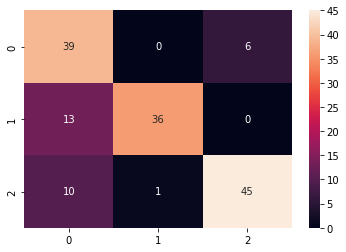

In [38]:
print(classification_report(y_right_second, y_predicted_second))
sns.heatmap(cnf_second, annot = True)

### Experiment third

**batch_size = 'auto'**\
**hidden_layer_sizes = 400**\
**learning_rate = 'invscaling'** : nghịch đảo này là tỷ lệ học tâpj mở rộng 


In [39]:
mlp_third = MLPClassifier(hidden_layer_sizes = 400,
                                activation = 'relu',
                                verbose = 1,
                                solver = 'adam',
                                batch_size = 'auto',
                                learning_rate = 'invscaling',
                                learning_rate_init = 0.001,
                                max_iter = 1000)

mlp_third = mlp_third.fit(x_train_sampled_data, y_train_sampled_data)

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.02706844
Iteration 2, loss = 0.94051237
Iteration 3, loss = 0.86741523
Iteration 4, loss = 0.80193377
Iteration 5, loss = 0.74878288
Iteration 6, loss = 0.70158974
Iteration 7, loss = 0.66321773
Iteration 8, loss = 0.63103855
Iteration 9, loss = 0.60409137
Iteration 10, loss = 0.58166792
Iteration 11, loss = 0.56217442
Iteration 12, loss = 0.54711271
Iteration 13, loss = 0.53457875
Iteration 14, loss = 0.52372999
Iteration 15, loss = 0.51404916
Iteration 16, loss = 0.50626195
Iteration 17, loss = 0.49879061
Iteration 18, loss = 0.49222613
Iteration 19, loss = 0.48676843
Iteration 20, loss = 0.48077763
Iteration 21, loss = 0.47547144
Iteration 22, loss = 0.47075869
Iteration 23, loss = 0.46589893
Iteration 24, loss = 0.46134613
Iteration 25, loss = 0.45676107
Iteration 26, loss = 0.45248765
Iteration 27, loss = 0.44811908
Iteration 28, loss = 0.44417290
Iteration 29, loss = 0.43978348
Iteration 30, loss = 0.43587396
Iteration 31, loss = 0.43185401
Iteration 32, los

Iteration 266, loss = 0.15216875
Iteration 267, loss = 0.15198042
Iteration 268, loss = 0.15151464
Iteration 269, loss = 0.15128537
Iteration 270, loss = 0.15072801
Iteration 271, loss = 0.15034660
Iteration 272, loss = 0.15010415
Iteration 273, loss = 0.14982230
Iteration 274, loss = 0.14929374
Iteration 275, loss = 0.14915237
Iteration 276, loss = 0.14918134
Iteration 277, loss = 0.14907792
Iteration 278, loss = 0.14864238
Iteration 279, loss = 0.14821440
Iteration 280, loss = 0.14785249
Iteration 281, loss = 0.14778962
Iteration 282, loss = 0.14739671
Iteration 283, loss = 0.14717917
Iteration 284, loss = 0.14682228
Iteration 285, loss = 0.14645081
Iteration 286, loss = 0.14678267
Iteration 287, loss = 0.14607782
Iteration 288, loss = 0.14605776
Iteration 289, loss = 0.14583339
Iteration 290, loss = 0.14533543
Iteration 291, loss = 0.14521354
Iteration 292, loss = 0.14485603
Iteration 293, loss = 0.14451492
Iteration 294, loss = 0.14438753
Iteration 295, loss = 0.14414842
Iteration 

Iteration 539, loss = 0.10497659
Iteration 540, loss = 0.10514662
Iteration 541, loss = 0.10447201
Iteration 542, loss = 0.10452286
Iteration 543, loss = 0.10454703
Iteration 544, loss = 0.10425638
Iteration 545, loss = 0.10409498
Iteration 546, loss = 0.10392742
Iteration 547, loss = 0.10379054
Iteration 548, loss = 0.10362962
Iteration 549, loss = 0.10358406
Iteration 550, loss = 0.10347078
Iteration 551, loss = 0.10353203
Iteration 552, loss = 0.10368066
Iteration 553, loss = 0.10344491
Iteration 554, loss = 0.10362249
Iteration 555, loss = 0.10313952
Iteration 556, loss = 0.10301573
Iteration 557, loss = 0.10292997
Iteration 558, loss = 0.10255373
Iteration 559, loss = 0.10252676
Iteration 560, loss = 0.10276312
Iteration 561, loss = 0.10292046
Iteration 562, loss = 0.10246828
Iteration 563, loss = 0.10219698
Iteration 564, loss = 0.10208324
Iteration 565, loss = 0.10204128
Iteration 566, loss = 0.10167968
Iteration 567, loss = 0.10171142
Iteration 568, loss = 0.10179315
Iteration 

Iteration 803, loss = 0.08030906
Iteration 804, loss = 0.08026455
Iteration 805, loss = 0.08051953
Iteration 806, loss = 0.08096315
Iteration 807, loss = 0.08030815
Iteration 808, loss = 0.08002539
Iteration 809, loss = 0.08028146
Iteration 810, loss = 0.08013820
Iteration 811, loss = 0.07982913
Iteration 812, loss = 0.07999128
Iteration 813, loss = 0.07996376
Iteration 814, loss = 0.07941169
Iteration 815, loss = 0.07983063
Iteration 816, loss = 0.07973730
Iteration 817, loss = 0.07945911
Iteration 818, loss = 0.07999227
Iteration 819, loss = 0.07944558
Iteration 820, loss = 0.07928809
Iteration 821, loss = 0.07948288
Iteration 822, loss = 0.07890503
Iteration 823, loss = 0.07934871
Iteration 824, loss = 0.07893302
Iteration 825, loss = 0.07933835
Iteration 826, loss = 0.07911084
Iteration 827, loss = 0.07898636
Iteration 828, loss = 0.07901099
Iteration 829, loss = 0.07863842
Iteration 830, loss = 0.07877922
Iteration 831, loss = 0.07833833
Iteration 832, loss = 0.07827618
Iteration 

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
yPred_third = mlp_third.predict(x_test_sampled_data)
scores_third = cross_val_score(mlp_third, y_test_sampled_data, yPred_third, cv = 10)

Iteration 1, loss = 1.15499293
Iteration 2, loss = 1.13447015
Iteration 3, loss = 1.11477870
Iteration 4, loss = 1.09605933
Iteration 5, loss = 1.07828512
Iteration 6, loss = 1.06147114
Iteration 7, loss = 1.04559806
Iteration 8, loss = 1.03067674
Iteration 9, loss = 1.01674005
Iteration 10, loss = 1.00371114
Iteration 11, loss = 0.99151807
Iteration 12, loss = 0.98014307
Iteration 13, loss = 0.96948508
Iteration 14, loss = 0.95951149
Iteration 15, loss = 0.95020105
Iteration 16, loss = 0.94139242
Iteration 17, loss = 0.93305423
Iteration 18, loss = 0.92517188
Iteration 19, loss = 0.91761784
Iteration 20, loss = 0.91027052
Iteration 21, loss = 0.90314081
Iteration 22, loss = 0.89620225
Iteration 23, loss = 0.88943993
Iteration 24, loss = 0.88269985
Iteration 25, loss = 0.87612648
Iteration 26, loss = 0.86954361
Iteration 27, loss = 0.86295046
Iteration 28, loss = 0.85638465
Iteration 29, loss = 0.84987463
Iteration 30, loss = 0.84341738
Iteration 31, loss = 0.83699992
Iteration 32, los

Iteration 261, loss = 0.37282992
Iteration 262, loss = 0.37249226
Iteration 263, loss = 0.37215834
Iteration 264, loss = 0.37182498
Iteration 265, loss = 0.37150656
Iteration 266, loss = 0.37118347
Iteration 267, loss = 0.37086580
Iteration 268, loss = 0.37054799
Iteration 269, loss = 0.37023895
Iteration 270, loss = 0.36993659
Iteration 271, loss = 0.36963034
Iteration 272, loss = 0.36933029
Iteration 273, loss = 0.36903819
Iteration 274, loss = 0.36874581
Iteration 275, loss = 0.36846074
Iteration 276, loss = 0.36818214
Iteration 277, loss = 0.36789297
Iteration 278, loss = 0.36761305
Iteration 279, loss = 0.36734193
Iteration 280, loss = 0.36706672
Iteration 281, loss = 0.36679639
Iteration 282, loss = 0.36653251
Iteration 283, loss = 0.36627348
Iteration 284, loss = 0.36601177
Iteration 285, loss = 0.36575156
Iteration 286, loss = 0.36550271
Iteration 287, loss = 0.36525484
Iteration 288, loss = 0.36500789
Iteration 289, loss = 0.36476081
Iteration 290, loss = 0.36451611
Iteration 

Iteration 179, loss = 0.42504451
Iteration 180, loss = 0.42415547
Iteration 181, loss = 0.42327544
Iteration 182, loss = 0.42240444
Iteration 183, loss = 0.42156761
Iteration 184, loss = 0.42073472
Iteration 185, loss = 0.41988721
Iteration 186, loss = 0.41906454
Iteration 187, loss = 0.41826904
Iteration 188, loss = 0.41747916
Iteration 189, loss = 0.41669585
Iteration 190, loss = 0.41593094
Iteration 191, loss = 0.41517896
Iteration 192, loss = 0.41442584
Iteration 193, loss = 0.41368002
Iteration 194, loss = 0.41293547
Iteration 195, loss = 0.41223135
Iteration 196, loss = 0.41152814
Iteration 197, loss = 0.41082440
Iteration 198, loss = 0.41014427
Iteration 199, loss = 0.40947259
Iteration 200, loss = 0.40880358
Iteration 201, loss = 0.40814884
Iteration 202, loss = 0.40750811
Iteration 203, loss = 0.40687119
Iteration 204, loss = 0.40624717
Iteration 205, loss = 0.40561609
Iteration 206, loss = 0.40500217
Iteration 207, loss = 0.40440247
Iteration 208, loss = 0.40381107
Iteration 

Iteration 110, loss = 0.50019401
Iteration 111, loss = 0.49813280
Iteration 112, loss = 0.49609882
Iteration 113, loss = 0.49411694
Iteration 114, loss = 0.49216506
Iteration 115, loss = 0.49025533
Iteration 116, loss = 0.48837869
Iteration 117, loss = 0.48651044
Iteration 118, loss = 0.48466746
Iteration 119, loss = 0.48285773
Iteration 120, loss = 0.48108194
Iteration 121, loss = 0.47934300
Iteration 122, loss = 0.47761535
Iteration 123, loss = 0.47590202
Iteration 124, loss = 0.47423186
Iteration 125, loss = 0.47260237
Iteration 126, loss = 0.47096641
Iteration 127, loss = 0.46937319
Iteration 128, loss = 0.46782672
Iteration 129, loss = 0.46631363
Iteration 130, loss = 0.46479040
Iteration 131, loss = 0.46328033
Iteration 132, loss = 0.46178798
Iteration 133, loss = 0.46034432
Iteration 134, loss = 0.45890336
Iteration 135, loss = 0.45749056
Iteration 136, loss = 0.45609797
Iteration 137, loss = 0.45473288
Iteration 138, loss = 0.45337141
Iteration 139, loss = 0.45203057
Iteration 

Iteration 367, loss = 0.35214037
Iteration 368, loss = 0.35204889
Iteration 369, loss = 0.35195800
Iteration 370, loss = 0.35186798
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.08491478
Iteration 2, loss = 1.07156439
Iteration 3, loss = 1.05866892
Iteration 4, loss = 1.04623147
Iteration 5, loss = 1.03432906
Iteration 6, loss = 1.02285656
Iteration 7, loss = 1.01181544
Iteration 8, loss = 1.00113612
Iteration 9, loss = 0.99080124
Iteration 10, loss = 0.98085993
Iteration 11, loss = 0.97128192
Iteration 12, loss = 0.96196543
Iteration 13, loss = 0.95290898
Iteration 14, loss = 0.94411692
Iteration 15, loss = 0.93557952
Iteration 16, loss = 0.92728033
Iteration 17, loss = 0.91916286
Iteration 18, loss = 0.91119650
Iteration 19, loss = 0.90335926
Iteration 20, loss = 0.89565621
Iteration 21, loss = 0.88807821
Iteration 22, loss = 0.88056556
Iteration 23, loss = 0.87313463
Iteration 24, loss = 0.86580493
Iteration 25, loss 

Iteration 247, loss = 0.36483856
Iteration 248, loss = 0.36457086
Iteration 249, loss = 0.36430662
Iteration 250, loss = 0.36404249
Iteration 251, loss = 0.36378474
Iteration 252, loss = 0.36353408
Iteration 253, loss = 0.36329075
Iteration 254, loss = 0.36304186
Iteration 255, loss = 0.36279567
Iteration 256, loss = 0.36255701
Iteration 257, loss = 0.36232265
Iteration 258, loss = 0.36209019
Iteration 259, loss = 0.36186043
Iteration 260, loss = 0.36163268
Iteration 261, loss = 0.36141038
Iteration 262, loss = 0.36118977
Iteration 263, loss = 0.36097158
Iteration 264, loss = 0.36075774
Iteration 265, loss = 0.36054895
Iteration 266, loss = 0.36033899
Iteration 267, loss = 0.36012870
Iteration 268, loss = 0.35992674
Iteration 269, loss = 0.35972894
Iteration 270, loss = 0.35953138
Iteration 271, loss = 0.35933446
Iteration 272, loss = 0.35914295
Iteration 273, loss = 0.35895468
Iteration 274, loss = 0.35876515
Iteration 275, loss = 0.35858029
Iteration 276, loss = 0.35839714
Iteration 

Iteration 171, loss = 0.40152138
Iteration 172, loss = 0.40057704
Iteration 173, loss = 0.39962494
Iteration 174, loss = 0.39868064
Iteration 175, loss = 0.39776213
Iteration 176, loss = 0.39684311
Iteration 177, loss = 0.39595726
Iteration 178, loss = 0.39506989
Iteration 179, loss = 0.39419103
Iteration 180, loss = 0.39333611
Iteration 181, loss = 0.39247837
Iteration 182, loss = 0.39161888
Iteration 183, loss = 0.39077112
Iteration 184, loss = 0.38994729
Iteration 185, loss = 0.38913860
Iteration 186, loss = 0.38833211
Iteration 187, loss = 0.38753797
Iteration 188, loss = 0.38675811
Iteration 189, loss = 0.38597841
Iteration 190, loss = 0.38521105
Iteration 191, loss = 0.38446849
Iteration 192, loss = 0.38373052
Iteration 193, loss = 0.38299114
Iteration 194, loss = 0.38226204
Iteration 195, loss = 0.38153919
Iteration 196, loss = 0.38085139
Iteration 197, loss = 0.38015987
Iteration 198, loss = 0.37947202
Iteration 199, loss = 0.37880558
Iteration 200, loss = 0.37813553
Iteration 

Iteration 117, loss = 0.51807842
Iteration 118, loss = 0.51604146
Iteration 119, loss = 0.51403926
Iteration 120, loss = 0.51205320
Iteration 121, loss = 0.51008624
Iteration 122, loss = 0.50814800
Iteration 123, loss = 0.50624398
Iteration 124, loss = 0.50437987
Iteration 125, loss = 0.50251583
Iteration 126, loss = 0.50067359
Iteration 127, loss = 0.49887563
Iteration 128, loss = 0.49712680
Iteration 129, loss = 0.49539419
Iteration 130, loss = 0.49366669
Iteration 131, loss = 0.49194404
Iteration 132, loss = 0.49025589
Iteration 133, loss = 0.48857928
Iteration 134, loss = 0.48692238
Iteration 135, loss = 0.48531095
Iteration 136, loss = 0.48373782
Iteration 137, loss = 0.48217355
Iteration 138, loss = 0.48059163
Iteration 139, loss = 0.47903965
Iteration 140, loss = 0.47751366
Iteration 141, loss = 0.47601993
Iteration 142, loss = 0.47455420
Iteration 143, loss = 0.47307320
Iteration 144, loss = 0.47161296
Iteration 145, loss = 0.47019504
Iteration 146, loss = 0.46876554
Iteration 

Iteration 46, loss = 0.74407600
Iteration 47, loss = 0.73869824
Iteration 48, loss = 0.73336145
Iteration 49, loss = 0.72807760
Iteration 50, loss = 0.72284268
Iteration 51, loss = 0.71764562
Iteration 52, loss = 0.71250296
Iteration 53, loss = 0.70743971
Iteration 54, loss = 0.70243559
Iteration 55, loss = 0.69748280
Iteration 56, loss = 0.69259556
Iteration 57, loss = 0.68776459
Iteration 58, loss = 0.68304429
Iteration 59, loss = 0.67839455
Iteration 60, loss = 0.67376249
Iteration 61, loss = 0.66920856
Iteration 62, loss = 0.66469669
Iteration 63, loss = 0.66025630
Iteration 64, loss = 0.65589652
Iteration 65, loss = 0.65160109
Iteration 66, loss = 0.64734476
Iteration 67, loss = 0.64315311
Iteration 68, loss = 0.63898524
Iteration 69, loss = 0.63481975
Iteration 70, loss = 0.63074668
Iteration 71, loss = 0.62673360
Iteration 72, loss = 0.62277446
Iteration 73, loss = 0.61883413
Iteration 74, loss = 0.61497219
Iteration 75, loss = 0.61117232
Iteration 76, loss = 0.60739919
Iteratio

Iteration 343, loss = 0.31318394
Iteration 344, loss = 0.31303237
Iteration 345, loss = 0.31288130
Iteration 346, loss = 0.31272950
Iteration 347, loss = 0.31258107
Iteration 348, loss = 0.31243528
Iteration 349, loss = 0.31229051
Iteration 350, loss = 0.31214607
Iteration 351, loss = 0.31200300
Iteration 352, loss = 0.31186205
Iteration 353, loss = 0.31172208
Iteration 354, loss = 0.31158436
Iteration 355, loss = 0.31144817
Iteration 356, loss = 0.31131188
Iteration 357, loss = 0.31117881
Iteration 358, loss = 0.31104658
Iteration 359, loss = 0.31090991
Iteration 360, loss = 0.31077624
Iteration 361, loss = 0.31064845
Iteration 362, loss = 0.31052087
Iteration 363, loss = 0.31039281
Iteration 364, loss = 0.31026522
Iteration 365, loss = 0.31013839
Iteration 366, loss = 0.31001166
Iteration 367, loss = 0.30989144
Iteration 368, loss = 0.30977072
Iteration 369, loss = 0.30964780
Iteration 370, loss = 0.30952942
Iteration 371, loss = 0.30941150
Iteration 372, loss = 0.30929282
Iteration 

Iteration 222, loss = 0.37965032
Iteration 223, loss = 0.37914850
Iteration 224, loss = 0.37865169
Iteration 225, loss = 0.37815427
Iteration 226, loss = 0.37767797
Iteration 227, loss = 0.37721058
Iteration 228, loss = 0.37674613
Iteration 229, loss = 0.37628125
Iteration 230, loss = 0.37583520
Iteration 231, loss = 0.37538998
Iteration 232, loss = 0.37495084
Iteration 233, loss = 0.37451112
Iteration 234, loss = 0.37408158
Iteration 235, loss = 0.37366690
Iteration 236, loss = 0.37325543
Iteration 237, loss = 0.37285431
Iteration 238, loss = 0.37245270
Iteration 239, loss = 0.37206009
Iteration 240, loss = 0.37168325
Iteration 241, loss = 0.37130733
Iteration 242, loss = 0.37092802
Iteration 243, loss = 0.37054943
Iteration 244, loss = 0.37017939
Iteration 245, loss = 0.36981989
Iteration 246, loss = 0.36946389
Iteration 247, loss = 0.36911165
Iteration 248, loss = 0.36876821
Iteration 249, loss = 0.36843534
Iteration 250, loss = 0.36809979
Iteration 251, loss = 0.36776590
Iteration 

Iteration 173, loss = 0.35573586
Iteration 174, loss = 0.35477955
Iteration 175, loss = 0.35383738
Iteration 176, loss = 0.35292035
Iteration 177, loss = 0.35202831
Iteration 178, loss = 0.35112682
Iteration 179, loss = 0.35023092
Iteration 180, loss = 0.34935114
Iteration 181, loss = 0.34848598
Iteration 182, loss = 0.34763123
Iteration 183, loss = 0.34679283
Iteration 184, loss = 0.34596206
Iteration 185, loss = 0.34513591
Iteration 186, loss = 0.34431692
Iteration 187, loss = 0.34350795
Iteration 188, loss = 0.34272841
Iteration 189, loss = 0.34195122
Iteration 190, loss = 0.34117225
Iteration 191, loss = 0.34041380
Iteration 192, loss = 0.33966330
Iteration 193, loss = 0.33892926
Iteration 194, loss = 0.33819278
Iteration 195, loss = 0.33748043
Iteration 196, loss = 0.33676761
Iteration 197, loss = 0.33606321
Iteration 198, loss = 0.33538368
Iteration 199, loss = 0.33470655
Iteration 200, loss = 0.33404236
Iteration 201, loss = 0.33338048
Iteration 202, loss = 0.33273066
Iteration 

Iteration 154, loss = 0.41025337
Iteration 155, loss = 0.40905255
Iteration 156, loss = 0.40784072
Iteration 157, loss = 0.40665133
Iteration 158, loss = 0.40549878
Iteration 159, loss = 0.40433534
Iteration 160, loss = 0.40315893
Iteration 161, loss = 0.40201482
Iteration 162, loss = 0.40088644
Iteration 163, loss = 0.39976016
Iteration 164, loss = 0.39864446
Iteration 165, loss = 0.39756401
Iteration 166, loss = 0.39646171
Iteration 167, loss = 0.39537619
Iteration 168, loss = 0.39430971
Iteration 169, loss = 0.39325018
Iteration 170, loss = 0.39222119
Iteration 171, loss = 0.39118984
Iteration 172, loss = 0.39016098
Iteration 173, loss = 0.38916602
Iteration 174, loss = 0.38818355
Iteration 175, loss = 0.38719029
Iteration 176, loss = 0.38622391
Iteration 177, loss = 0.38524409
Iteration 178, loss = 0.38427985
Iteration 179, loss = 0.38332527
Iteration 180, loss = 0.38237768
Iteration 181, loss = 0.38147464
Iteration 182, loss = 0.38057925
Iteration 183, loss = 0.37965758
Iteration 

In [41]:
y_predicted_third = np.array(mlp_third.predict(x_test_sampled_data))
y_right_third = np.array(y_test_sampled_data)

cnf_third = confusion_matrix(y_right_third, y_predicted_third)
np.set_printoptions(precision = 2)
cnf_third

array([[44,  0,  1],
       [ 5, 43,  1],
       [ 6,  1, 49]], dtype=int64)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        45
           1       0.98      0.88      0.92        49
           2       0.96      0.88      0.92        56

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150



<AxesSubplot:>

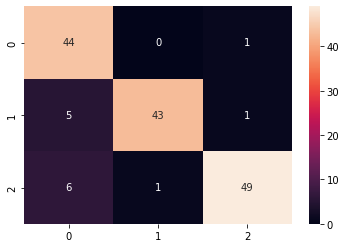

In [42]:
print(classification_report(y_right_third, y_predicted_third))
sns.heatmap(cnf_third, annot = True)

Tốc độ học tập là một siêu tham số có thể định cấu hình được sử dụng trong việc đào tạo mạng nơ-ron có phạm vi giá trị dương từ 0 đến 1.

**Learning_rate  = constant**: đối với experiment_first là tốc độ học tập không đổi được cung cấp bởi learning_rate_init\
**Learning_rate = adaptive**: đối với experiment_second có nghĩa là tốc độ học không đổi thành learning_rate_init, trong đó traning loss tiếp tục giảm, được sử dụng khi **solver = 'sgd'**\
**Learning_rate = invscaling**: làm giảm dần tốc độ học tập tại mỗi thời điểm bước 't' bằng cách sử dụng thử nghiệm gọi ngược của 'power_t'\
**effect_learning_rate = learning_rate_int / pow (t, power_t)**